# Conception d'une application au service de la santé publique
## Partie 2 : Analyse des données
La seconde partie de ce travail consistera à l'analyse des variables sélectionnées après le nettoyage des données réalisé dans la partie 1. Le travail d'analyse sera divisé en 2 sections principales :
- Section 1 : analyses univariées ;
- Section 2 : analyses multivariées ;
- Section 3 : Réduction dimensionnelle.

A l'issue de ces analyses, on tirera une conclusion sur l'utilisabilité des données pour la réalisation de l'application.

### Importation des librairies

In [1]:
import pandas as pd # pour la manipulation des données
import numpy as np # pour la manipulation des tableaux/matrix
# Visualisation des données et style de tracé
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from matplotlib import style
# Analyse statistique
import scipy.stats as stats
import statistics

### Chargement du jeu de données 

In [2]:
leucinose = pd.read_csv("leucinose.csv", sep="\t", low_memory=False)

### Description du jeu de données

In [3]:
# Informations générales du jeu de données
leucinose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90970 entries, 0 to 90969
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          90970 non-null  int64  
 1   code                90970 non-null  object 
 2   product_name        90970 non-null  object 
 3   additives_n         90970 non-null  float64
 4   additives_fr        30430 non-null  object 
 5   nutrition_grade_fr  90970 non-null  object 
 6   pnns_groups_1       90970 non-null  object 
 7   pnns_groups_2       90970 non-null  object 
 8   image_url           49939 non-null  object 
 9   energy_100g         90970 non-null  float64
 10  fat_100g            90970 non-null  float64
 11  saturated_fat_100g  90970 non-null  float64
 12  carbohydrates_100g  90970 non-null  float64
 13  sugars_100g         90970 non-null  float64
 14  fiber_100g          90970 non-null  float64
 15  proteins_100g       90970 non-null  float64
 16  salt

On note la précense de la variable "Unnamed: 0", qui n'a aucune signification.

In [4]:
leucinose = leucinose.drop(columns=["Unnamed: 0"])

**_Description des données_**

In [5]:
# Description des variables quantitatives
leucinose.describe(exclude="object").T

count         mean         std  min         25%  \
additives_n         90970.0     1.090810    2.166474  0.0    0.000000   
energy_100g         90970.0  1098.191376  627.890747  0.0  625.000000   
fat_100g            90970.0    12.618200   12.120068  0.0    2.900000   
saturated_fat_100g  90970.0     5.301259    6.875049  0.0    0.700000   
carbohydrates_100g  90970.0    27.309032   21.732527  0.0    8.580000   
sugars_100g         90970.0    13.382773   15.836880 -0.1    2.100000   
fiber_100g          90970.0     2.839281    3.774996  0.0    0.600000   
proteins_100g       90970.0     7.795596    6.610299  0.0    3.600000   
salt_100g           90970.0     1.170813    3.497440  0.0    0.160000   
sodium_100g         90970.0     0.460125    1.373627  0.0    0.062992   

                            50%          75%          max  
additives_n            0.000000     1.000000    31.000000  
energy_100g         1097.545074  1458.000000  3477.000000  
fat_100g              12.982817    14.800000   100.000000  
saturated_fat_100g     5.276107     5.276107   100.000000  
carbohydrates_100g    28.133105    33.000000   100.000000  
sugars_100g           13.415905    13.415905   100.000000  
fiber_100g             2.559801     2.559801   100.000000  
proteins_100g          7.769631     8.000000   100.000000  
salt_100g              1.100000     1.191124   100.000000  
sodium_100g            0.433071     0.469009    39.370079

In [6]:
# Description des variables quantitatives
leucinose.describe(exclude="number").T

count unique  \
code                90970  90970   
product_name        90970  74205   
additives_fr        30430  11533   
nutrition_grade_fr  90970      5   
pnns_groups_1       90970      9   
pnns_groups_2       90970     40   
image_url           49939  49939   

                                                                  top   freq  
code                                                    0000000003087      1  
product_name                                               Mayonnaise     52  
additives_fr                                        E322 - Lécithines   1712  
nutrition_grade_fr                                                  e  41297  
pnns_groups_1                                           Sugary snacks  48928  
pnns_groups_2                                          One-dish meals  41966  
image_url           http://fr.openfoodfacts.org/images/products/00...      1

Suite au nettoyage effectué dans le Notebook précédent, les valeurs médianes, écarts-type, fréquences et valeurs min/max semblent être cohérentes compte tenu du volume de données.

### Section 1 : analyses univariées

##### Regroupement des variables par cartégorie

In [7]:
# Variables numériques
var_num = leucinose.select_dtypes(include=np.number).columns
var_num

Index(['additives_n', 'energy_100g', 'fat_100g', 'saturated_fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g'],
      dtype='object')

In [8]:
# Variables qualitatives
var_qual = leucinose.select_dtypes(include="object").columns
var_qual

Index(['code', 'product_name', 'additives_fr', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'image_url'],
      dtype='object')

**_paramétrage de nutrigrade pour l'affichage_**

In [9]:
# Tansformer les caractères du nutrigrade en majuscule
leucinose['nutrition_grade_fr'] = leucinose['nutrition_grade_fr'].str.upper().apply(str)
leucinose["nutrition_grade_fr"].head()

0    E
1    E
2    E
3    E
4    E
Name: nutrition_grade_fr, dtype: object

In [10]:
# Palette de couleur pour le grade nutritionnel
# Palette des couleurs du nutrigrade
palette_nutri = {"A": "green", "B": "lawngreen",
                 "C": "yellow", "D": "orange", "E": "red"}
# Couleurs du nutrigrade
colors_nutri = ["green", "lawngreen", "yellow", "orange", "red"]

#### 1. Analyse descriptive des variables quantitative
#### Vérification de la normalité
Vérifier la normalité des distribution permettra choisir entre les tests paramétriques et non paramétrique pour les analyses.
La vérification se fera à l'aide de :
- Deux types de graphique : l'histogramme et la boîte à moustache;
- Et avec les calculs du Skewness, du Skewness et le test de Jarque-Bera.

**_Interprétation des résultats :_**
- Le Skewness :
    * Si > 0 : La distribution est asymétrique vers la droite.
    * Si = 0 : La distribution est qualifiée de normale et symétrique.
    * Si < 0 : La distribution est asymétrique vers la gauche.
- Le Kurtosis :
    * Si > 3 : La distribution est dite pointue et donc leptokurtotique.
    * Si = 3 : La distribution est qualifiée de normale.
    * Si < 3 : La distribution est dite écrasée et donc playkurtotique.
- Le test de Jarque-Bera :
    * Si = 0, la distribution suit la loi normale ;
    * Si ≠ 0, la distribution ne suis pas la loi normale.

In [11]:
# Définition de la fonction des tracées d'histogramme et de boîte à moustache
def univariate_distribution_1(dataframe,feature):
    
    # Définition des données à tracer
    x=leucinose[feature]
    
    # Propriétés graphiques de la figure principale
    fig = plt.figure(figsize=(20, 6))
    
    plt.suptitle("Distribution statistique empirique : " + feature, fontsize=15)
    
    # Principales propriétés graphiques de l'histogramme
    ax1 = plt.subplot(1,2,1)
    ax1 = sns.histplot(leucinose[feature], kde=True, line_kws={'lw': 2}, color='red')
    ax1.set_ylabel("Fréquence", fontsize=12)
    ax1.set_xlabel(feature, fontsize=12)
    kde=True

    # Principales propriétés graphiques de la boîte à moustache
    ax2 = plt.subplot(1,2,2)
    medianprops = {"color":"red"}
    meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'white'}
    
    # Tracer des graphiques
    ax1.hist(x, bins=22, edgecolor="white")
    ax2.boxplot(leucinose[feature], showfliers=True, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.ylabel(feature, fontsize=10)
    plt.show()

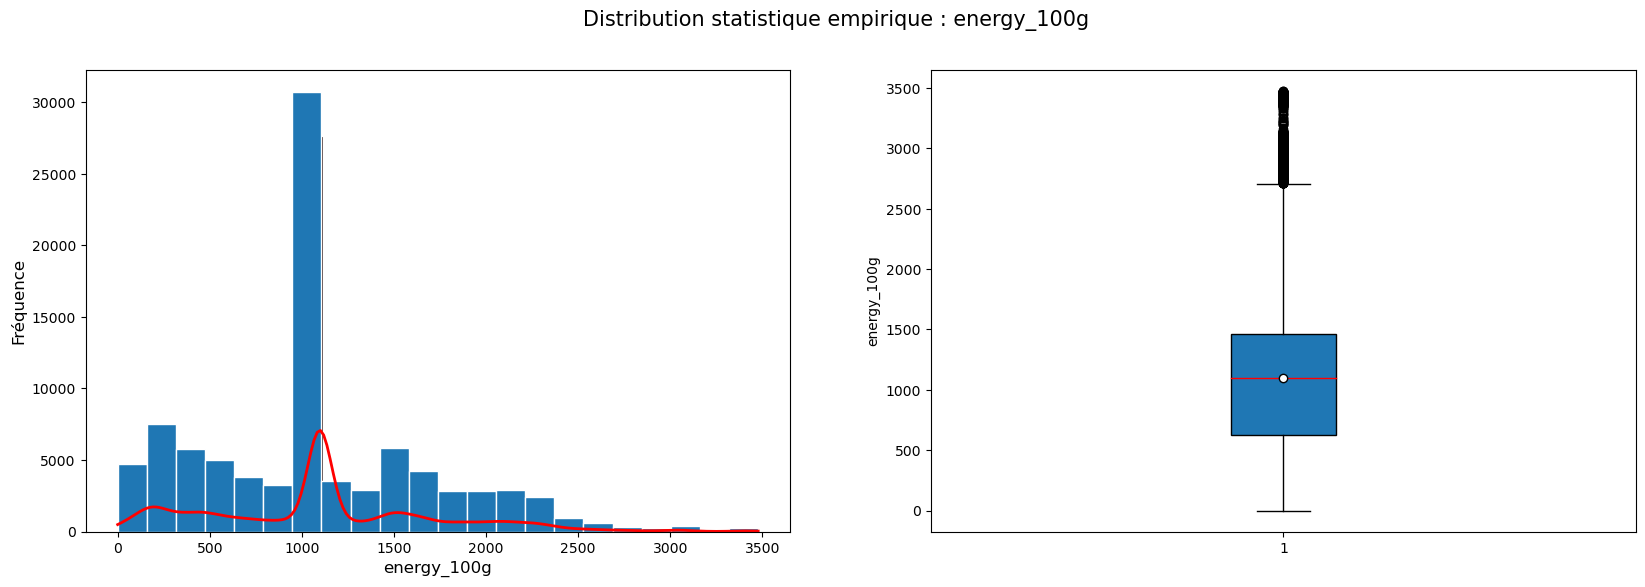

In [12]:
univariate_distribution_1(leucinose,'energy_100g')

In [13]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["energy_100g"]))
print("kurtosis : ", leucinose["energy_100g"].kurtosis())
print("skew : ", leucinose["energy_100g"].skew())
print("mode : ",statistics.mode(leucinose["energy_100g"]))
print("moyenne : ", leucinose["energy_100g"].mean())
print("Ecart-type : ", leucinose["energy_100g"].std())

jarque_bera :  Jarque_beraResult(statistic=4345.527656824571, pvalue=0.0)
kurtosis :  0.29089927295279905
skew :  0.5152454462533006
mode :  1097.545073990469
moyenne :  1098.1913757120676
Ecart-type :  627.890747119174


La statistique du test de Jarque Bera est 4345 et la valeur de p correspondante est 0,0. Puisque cette valeur de p est inférieure à 0,05, l'hypothèse nulle est rejetée. Ainsi, on peut dire que ces données ont une asymétrie différente de la normale. La distribution est asymétrique vers la droite (skew > 0). <br> Un pic autour de 1097 Kj.<br>
L'écart-type est très élevé, les valeurs sont donc forte éloignées de la moyenne.

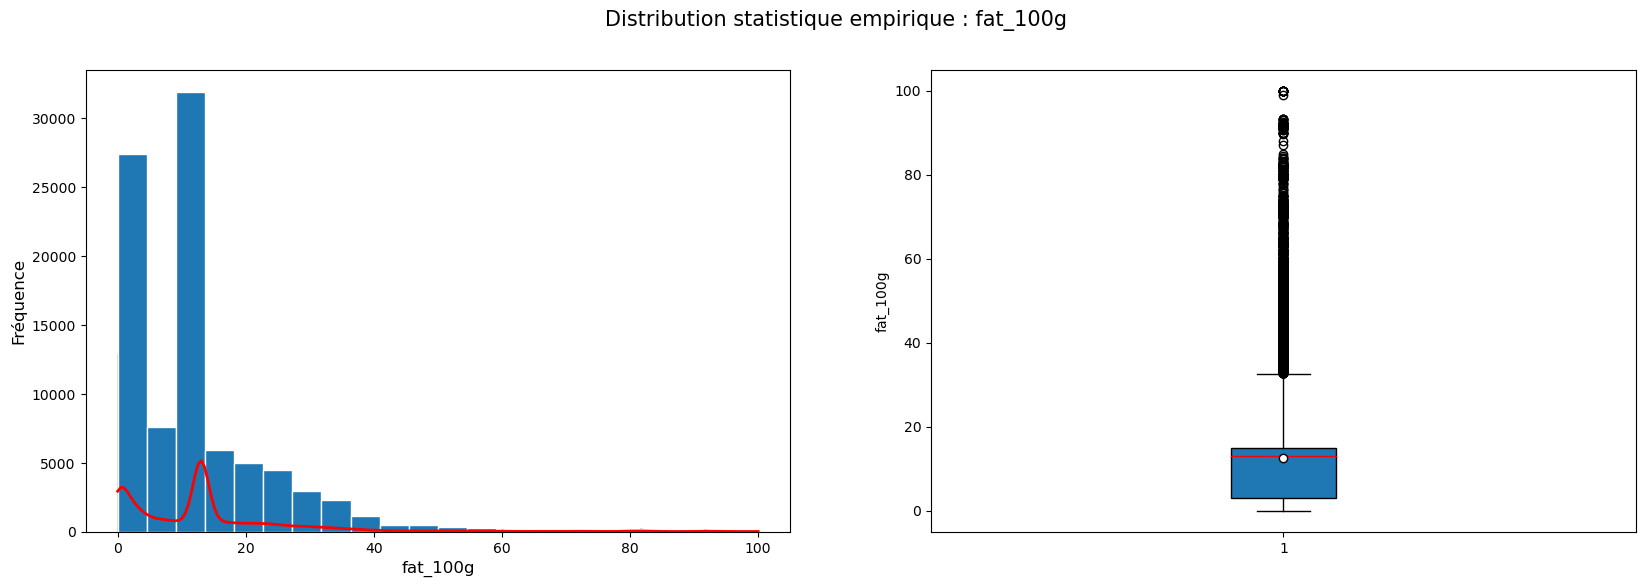

In [14]:
univariate_distribution_1(leucinose,'fat_100g')

In [15]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["fat_100g"]))
print("kurtosis : ", leucinose["fat_100g"].kurtosis())
print("skew : ", leucinose["fat_100g"].skew())
print("mode : ",statistics.mode(leucinose["fat_100g"]))
print("moyenne : ", leucinose["fat_100g"].mean())
print("Ecart-type : ", leucinose["fat_100g"].std())

jarque_bera :  Jarque_beraResult(statistic=344331.90047152014, pvalue=0.0)
kurtosis :  8.452329100144684
skew :  2.202867328324712
mode :  12.982817376428754
moyenne :  12.6181995526475
Ecart-type :  12.120068077603293


Distribution asymétrique vers la droite.<br>
La majorité des produits ont une teneur en gras modérée, autour de 13g pour 100g d'aliments.<br>
L'écart-type est largement supérieure à 0 et se rapproche de la moyenne. Les valeurs sont donc éloignées de la moyenne.

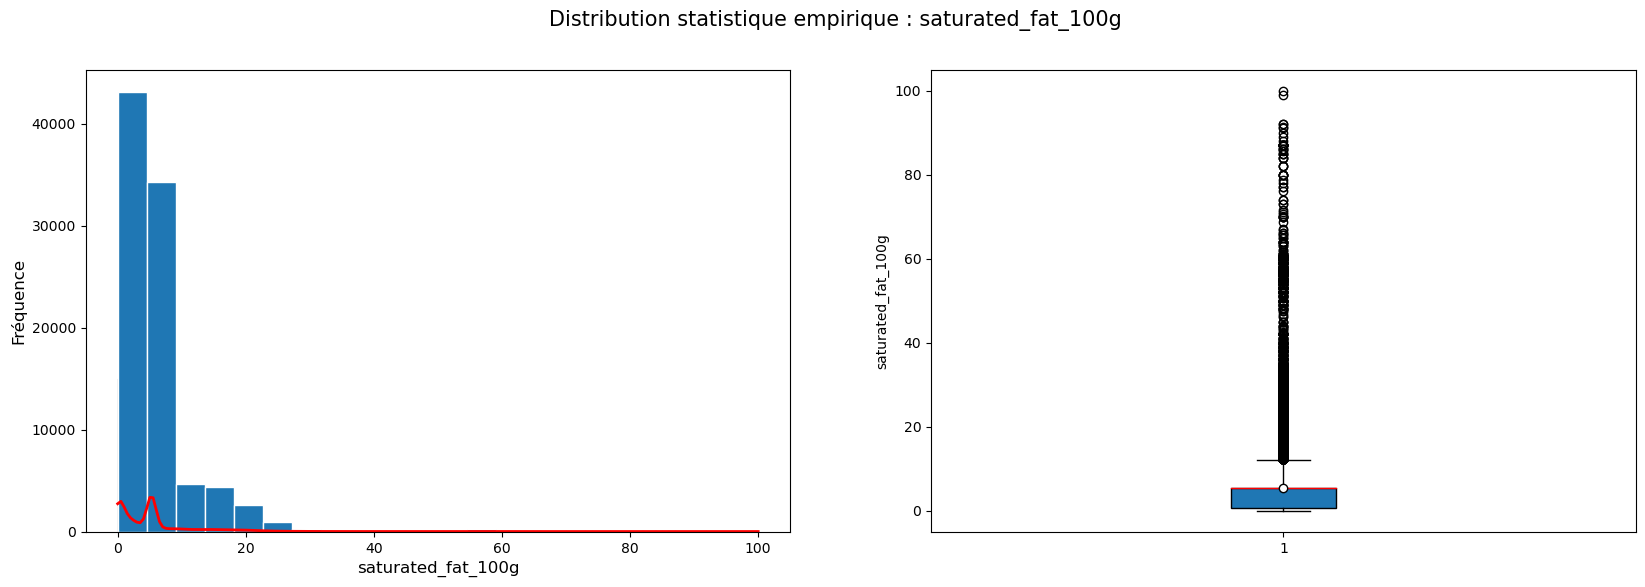

In [16]:
univariate_distribution_1(leucinose,'saturated_fat_100g')

In [17]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["saturated_fat_100g"]))
print("kurtosis : ", leucinose["saturated_fat_100g"].kurtosis())
print("skew : ", leucinose["saturated_fat_100g"].skew())
print("mode : ",statistics.mode(leucinose["saturated_fat_100g"]))
print("moyenne : ", leucinose["saturated_fat_100g"].mean())
print("Ecart_type : ", leucinose["saturated_fat_100g"].std())

jarque_bera :  Jarque_beraResult(statistic=2640646.6438867594, pvalue=0.0)
kurtosis :  25.23997639478729
skew :  3.8627342791315415
mode :  5.276106548431106
moyenne :  5.3012594490097245
Ecart_type :  6.875049415780237


Distribution asymétrique vers la droite.<br>
Les valeurs sont éloignées de la moyenne, avec un écart-type supérieure à la moyenne.

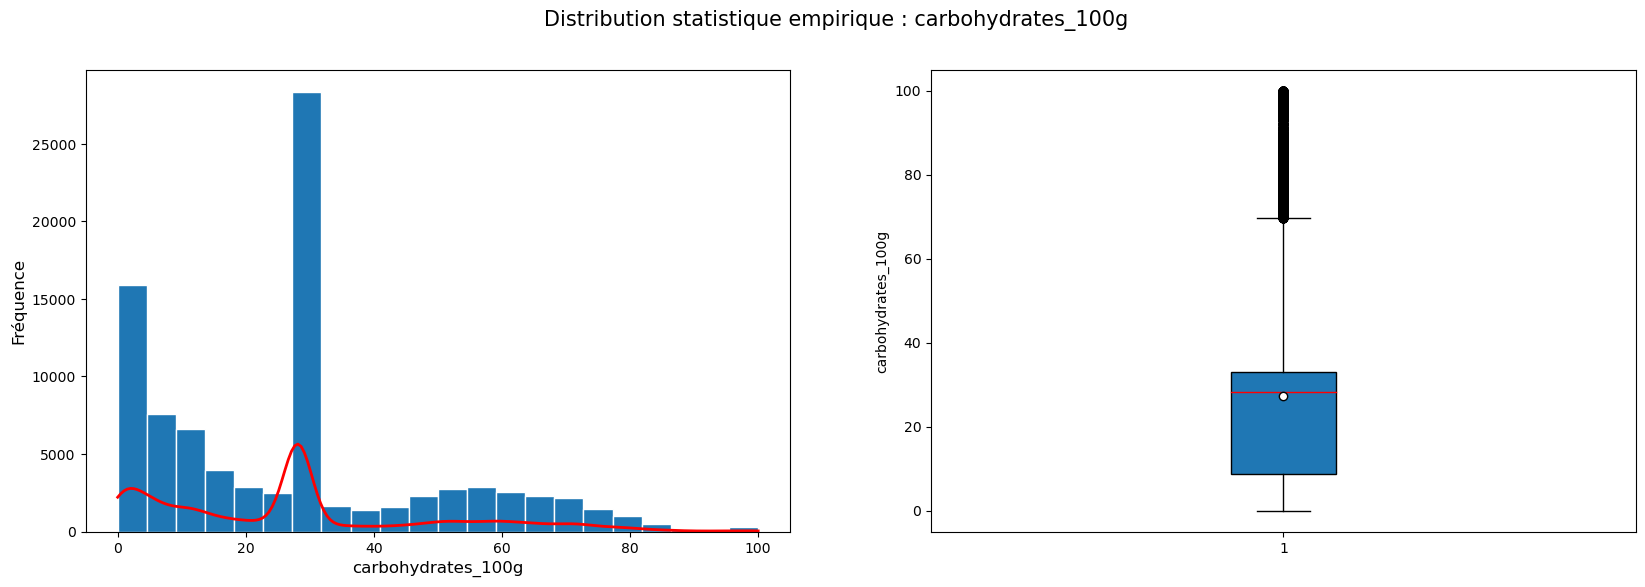

In [18]:
univariate_distribution_1(leucinose,'carbohydrates_100g')

In [19]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["carbohydrates_100g"]))
print("kurtosis : ", leucinose["carbohydrates_100g"].kurtosis())
print("skew : ", leucinose["carbohydrates_100g"].skew())
print("mode : ",statistics.mode(leucinose["carbohydrates_100g"]))
print("moyenne : ", leucinose["carbohydrates_100g"].mean())
print("Ecart_type : ", leucinose["carbohydrates_100g"].std())

jarque_bera :  Jarque_beraResult(statistic=10222.119868339902, pvalue=0.0)
kurtosis :  0.0532093052570497
skew :  0.8206853397953395
mode :  28.133105362182505
moyenne :  27.309031844835
Ecart_type :  21.732527083302454


Distribution asymétrique vers la droite.<br>
L'écart-type est largement supérieure à 0. Les valeurs sont donc éloignées de la moyenne.

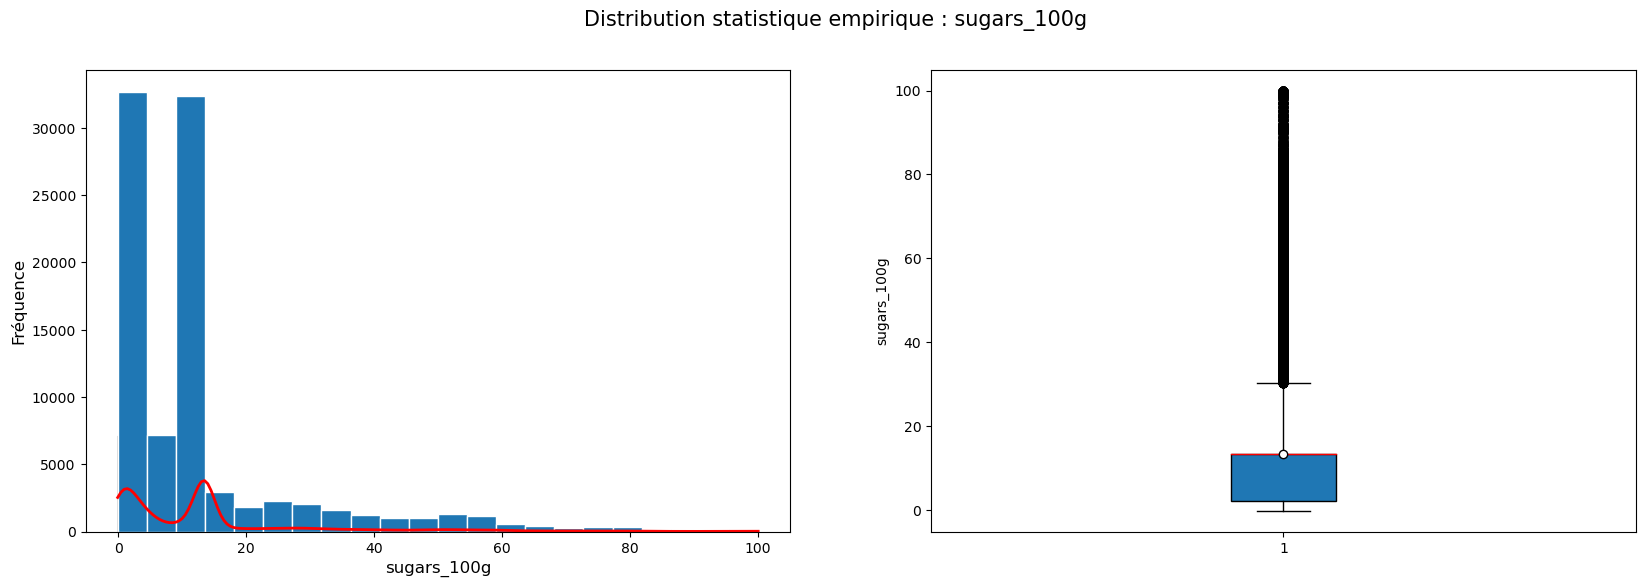

In [20]:
univariate_distribution_1(leucinose,'sugars_100g')

In [21]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["sugars_100g"]))
print("kurtosis : ", leucinose["sugars_100g"].kurtosis())
print("skew : ", leucinose["sugars_100g"].skew())
print("mode : ",statistics.mode(leucinose["sugars_100g"]))
print("moyenne : ", leucinose["sugars_100g"].mean())
print("Ecart_type : ", leucinose["sugars_100g"].std())

jarque_bera :  Jarque_beraResult(statistic=211382.97737172374, pvalue=0.0)
kurtosis :  5.9357230880547895
skew :  2.2660685237030544
mode :  13.41590499027868
moyenne :  13.382773396563362
Ecart_type :  15.836880144928575


Distribution asymétrique vers la droite.<br> L'écart-type est largement supérieure à 0 et se rapproche de la moyenne. Les valeurs sont donc éloignées de la moyenne.

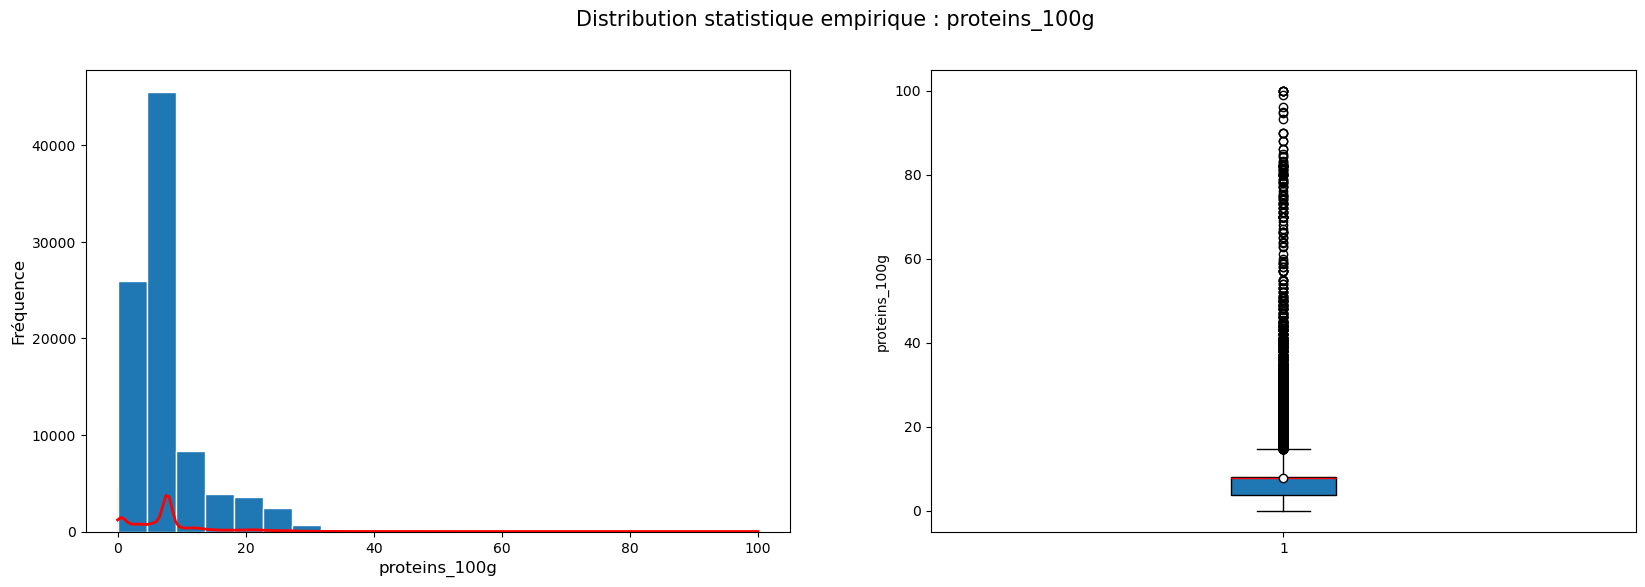

In [22]:
univariate_distribution_1(leucinose,'proteins_100g')

In [23]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["proteins_100g"]))
print("kurtosis : ", leucinose["proteins_100g"].kurtosis())
print("skew : ", leucinose["proteins_100g"].skew())
print("Médiane : ",leucinose["proteins_100g"].median())
print("moyenne : ", leucinose["proteins_100g"].mean())
print("Ecart_type : ", leucinose["proteins_100g"].std())

jarque_bera :  Jarque_beraResult(statistic=1342585.7005759839, pvalue=0.0)
kurtosis :  18.017523739122893
skew :  2.720899797477777
Médiane :  7.769630850059774
moyenne :  7.795595681913221
Ecart_type :  6.610298740480074


Distribution asymétrique vers la droite. <br> 50% des produits sont riches en protéines avec une teneur équivalente à 8g pour 100g d'aliment.<br>
L'écart-type est largement supérieure à 0 et se rapproche de la moyenne. Les valeurs sont donc éloignées de la moyenne.

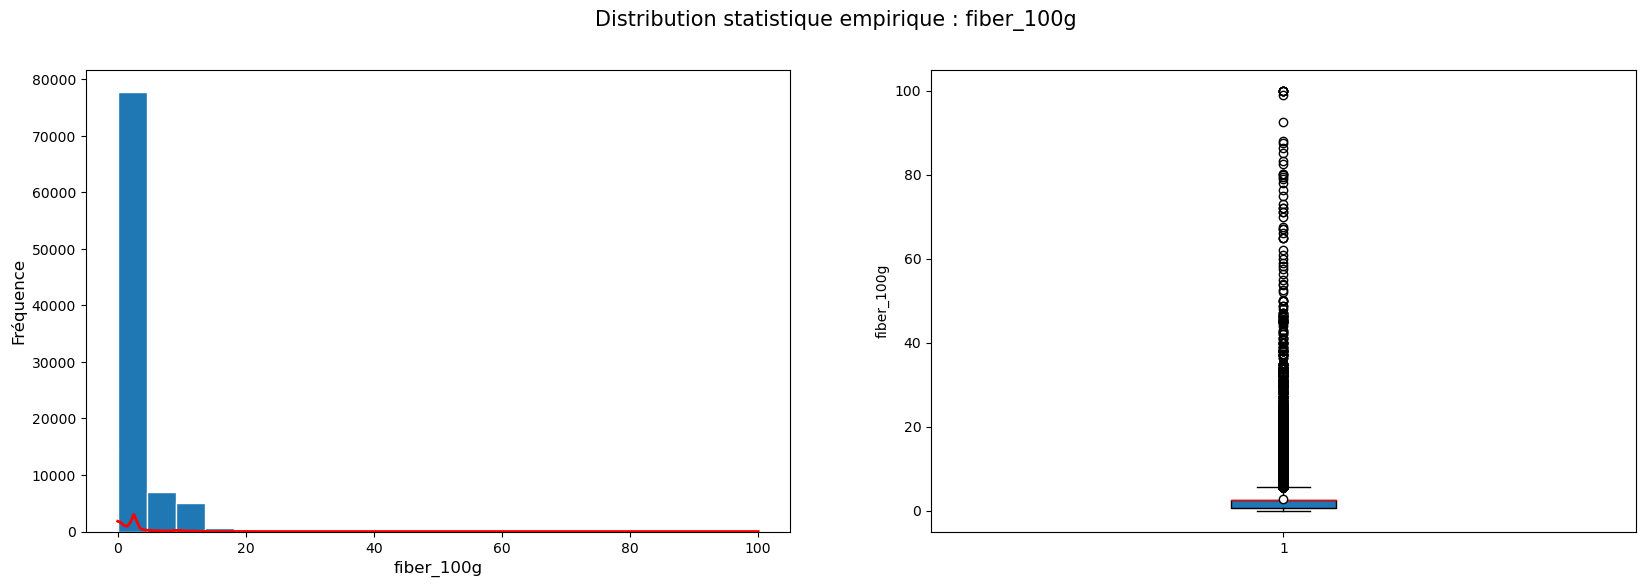

In [24]:
univariate_distribution_1(leucinose,'fiber_100g')

In [25]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["fiber_100g"]))
print("kurtosis : ", leucinose["fiber_100g"].kurtosis())
print("skew : ", leucinose["fiber_100g"].skew())
print("mode : ",statistics.mode(leucinose["fiber_100g"]))
print("moyenne : ", leucinose["fiber_100g"].mean())
print("Ecart_type : ", leucinose["fiber_100g"].std())

jarque_bera :  Jarque_beraResult(statistic=39479968.25462949, pvalue=0.0)
kurtosis :  101.18562193639455
skew :  6.677343326038537
mode :  2.5598007396845204
moyenne :  2.8392810692505974
Ecart_type :  3.7749964780581773


Distribution asymétrique vers la droite.<br>
L'écart-type est faiblement éloigné de 0, mais supérieure à la moyenne. Les valeurs sont donc faible éloignées de la moyenne.

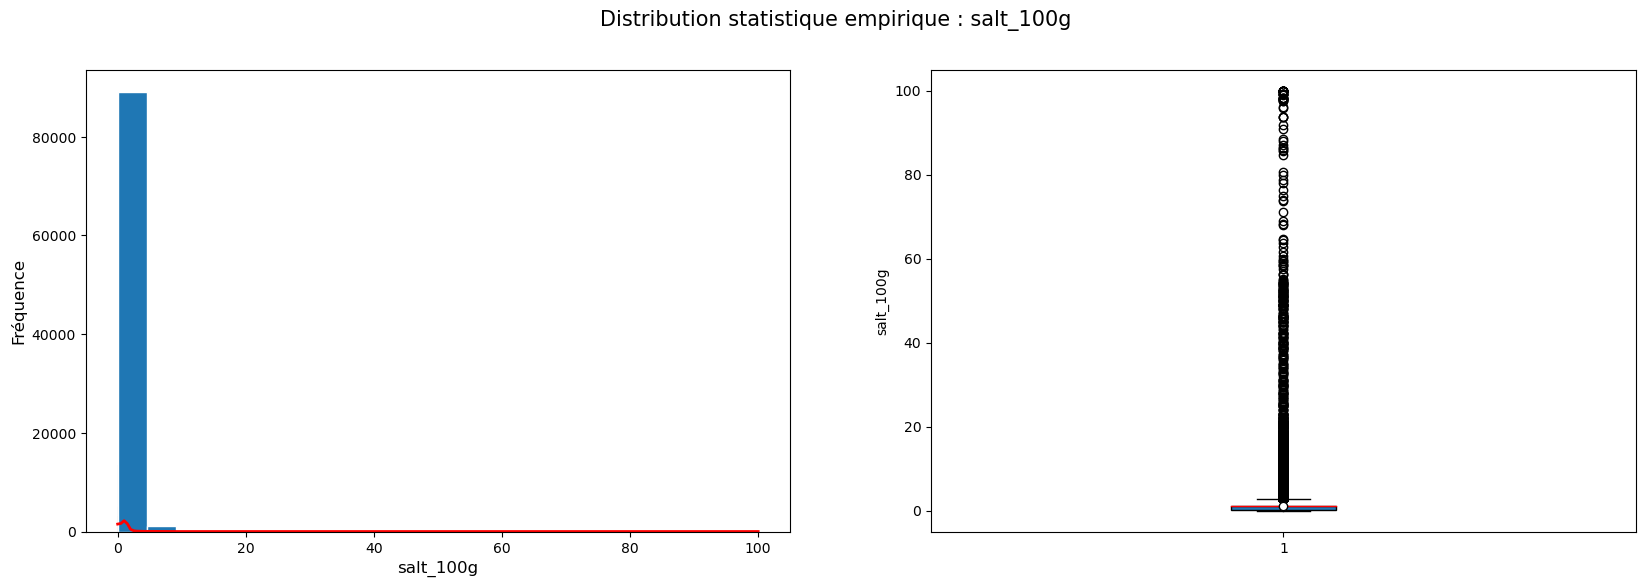

In [26]:
univariate_distribution_1(leucinose,'salt_100g')

In [27]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["salt_100g"]))
print("kurtosis : ", leucinose["salt_100g"].kurtosis())
print("skew : ", leucinose["salt_100g"].skew())
print("mode : ",statistics.mode(leucinose["salt_100g"]))
print("moyenne : ", leucinose["salt_100g"].mean())
print("Ecart_type : ", leucinose["salt_100g"].std())

jarque_bera :  Jarque_beraResult(statistic=698368874.9691645, pvalue=0.0)
kurtosis :  427.6596487780546
skew :  18.529494014236995
mode :  1.1911237856608872
moyenne :  1.1708128890399883
Ecart_type :  3.497440409404689


Distribution asymétrique vers la droite.<br>L'écart-type est faiblement éloigné de 0, mais supérieure à la moyenne. Les valeurs sont donc faible éloignées de la moyenne.

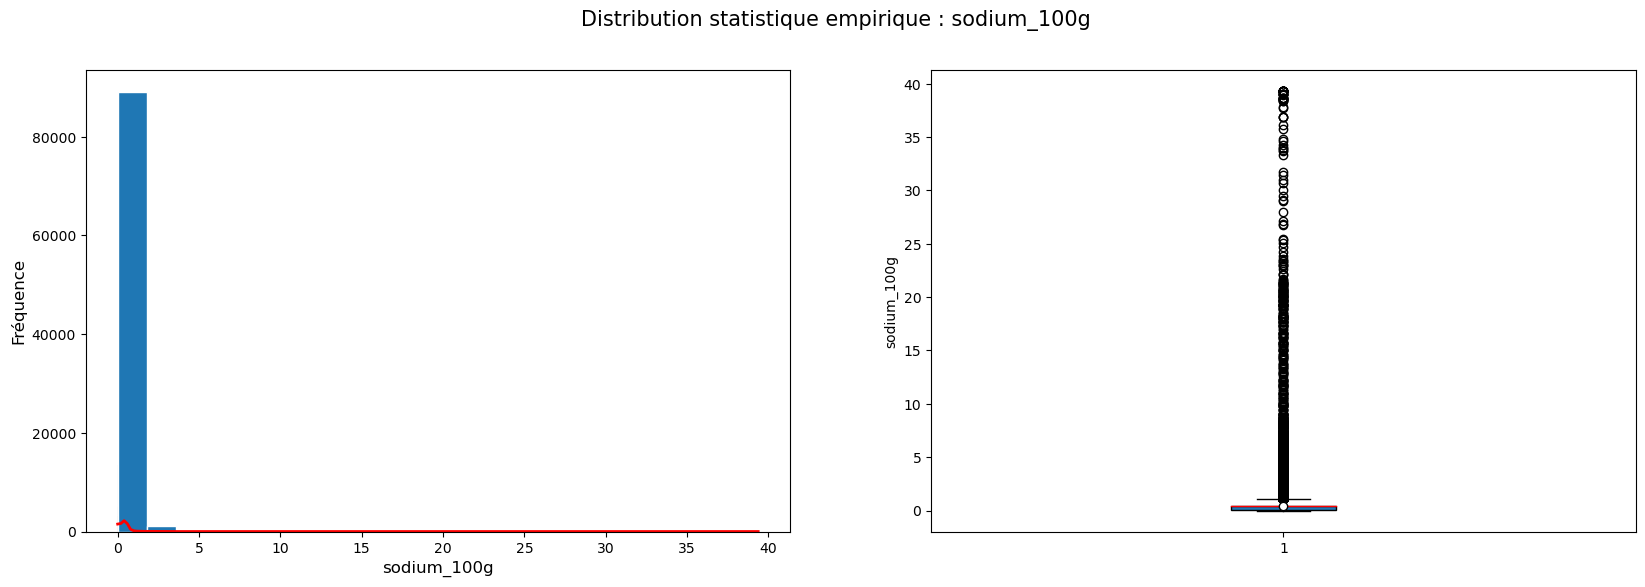

In [28]:
univariate_distribution_1(leucinose,'sodium_100g')

In [29]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["sodium_100g"]))
print("kurtosis : ", leucinose["sodium_100g"].kurtosis())
print("skew : ", leucinose["sodium_100g"].skew())
print("mode : ",statistics.mode(leucinose["sodium_100g"]))
print("moyenne : ", leucinose["sodium_100g"].mean())
print("Ecart_type : ", leucinose["sodium_100g"].std())

jarque_bera :  Jarque_beraResult(statistic=710412735.1053696, pvalue=0.0)
kurtosis :  431.34401560800586
skew :  18.616410578580926
mode :  0.4690092403443168
moyenne :  0.4601249696307827
Ecart_type :  1.3736268164777417


Distribution asymétrique vers la droite.<br> L'acart-type est égal à un (proche de 0). Les valeurs sont regroupées autour de la moyenne.

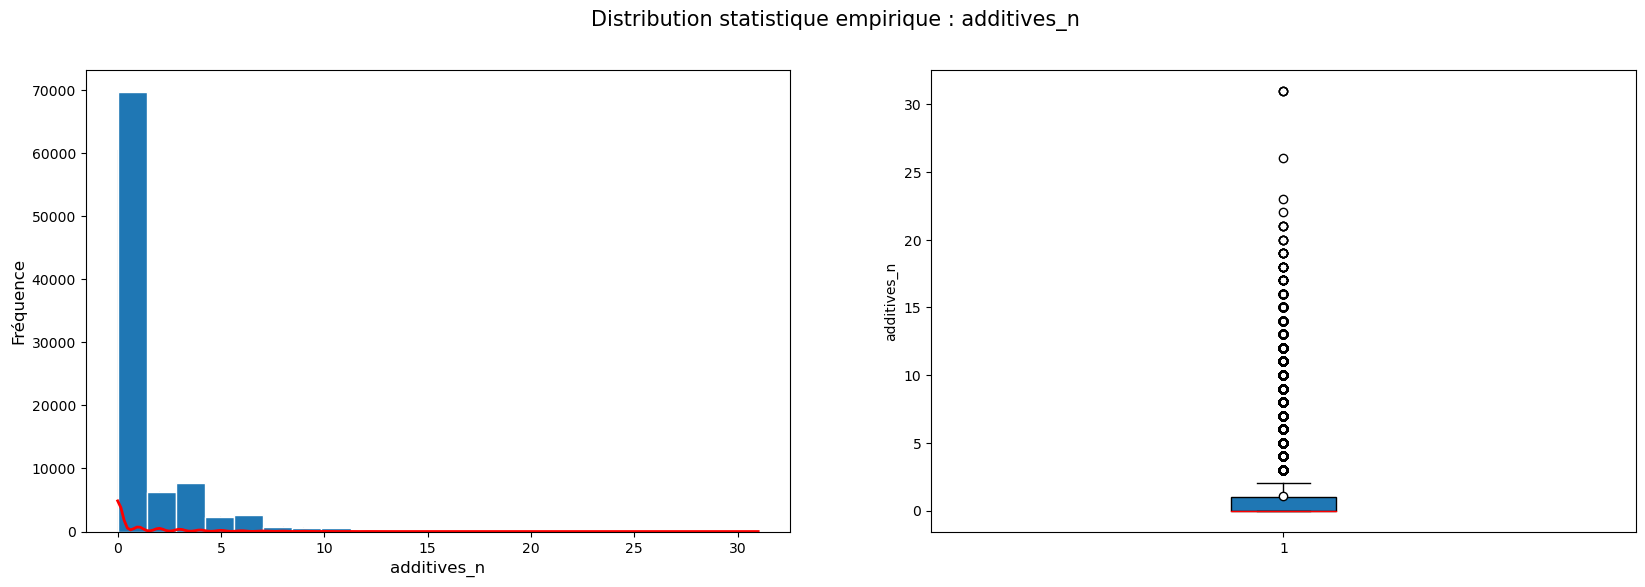

In [30]:
univariate_distribution_1(leucinose,'additives_n')

In [31]:
# Mesure de la distribution
print("jarque_bera : ", stats.jarque_bera(leucinose["additives_n"]))
print("kurtosis : ", leucinose["additives_n"].kurtosis())
print("skew : ", leucinose["additives_n"].skew())
print("mode : ",statistics.mode(leucinose["additives_n"]))
print("moyenne : ", leucinose["additives_n"].mean())
print("Ecart_type : ", leucinose["additives_n"].std())

jarque_bera :  Jarque_beraResult(statistic=600252.5893805412, pvalue=0.0)
kurtosis :  11.181869402494597
skew :  2.8871567813977403
mode :  0.0
moyenne :  1.0908101571946796
Ecart_type :  2.166473609948339


Distribution asymétrique vers la droite.<br>
La majorité des produits ne contiennent pas d'additifs ou tout au moins cette information n'a pas été renseignée par les utisateurs d'Open Food Facts.
environ 30% des produits contiennent entre 1 et 7 additifs.<br>
L'amplitude du nombre d'additif est compris entre 0 et 30 mais la moyenne est de 1 additif par produit en tenant compte des saisies des utilisateurs.<br>
L'écart-type égal à 2, montre une dispersion proche de la moyenne.

##### Bilan
L'ensemble des variables montrent des distributions très inégalitaires, étalées sur la droite, avec un skewness positif : aucune distribution ne suit la loi normale.<br> Les courbes sont moins aplaties que la distribution normale donc les observations sont plus concentrées d'après les kurtosis empiriques positifs. Exception pour la courbe des glucides et la courbe de l'énergie, avec des kurtosis inférieure à 3 (donc une distribution plus aplatie que la distribution normale).<br> D'après l'observation des boîtes à moustache et les écrat-type, les valeurs des variables quantitatives sont très dispersées autour de la moyenne.

#### 1. Analyse descriptive des variables qualitatives
##### Le nutrigrade

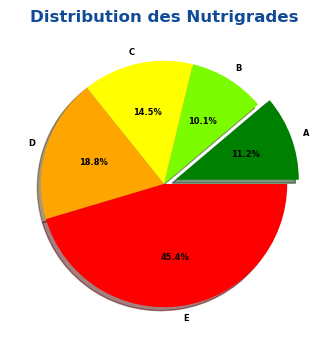

In [32]:
# Proportion des grades nuutritionnels dans le jeu de données
police_titre = {'family': 'sans serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 12,
             }

nutrigrades = leucinose.groupby(by='nutrition_grade_fr')['code'].nunique()
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))
colors_nutri = ["green", "lawngreen", "yellow", "orange", "red"]
explodes = np.zeros(5)
explodes[0] = .1

plt.pie(nutrigrades, labels=nutrigrades.index, colors=colors_nutri,
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=6, weight="bold"))
plt.title("Distribution des Nutrigrades", fontdict=police_titre)
plt.show()

Text(0, 0.5, 'Nombre de produits')

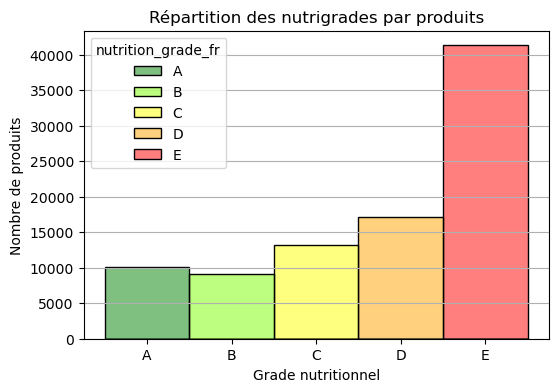

In [33]:
plt.figure(figsize=(6, 4))

sns.histplot(data=leucinose.sort_values("nutrition_grade_fr"), palette=colors_nutri, 
             x="nutrition_grade_fr", hue="nutrition_grade_fr")
plt.title('Répartition des nutrigrades par produits')
plt.grid(axis="y")
plt.xlabel("Grade nutritionnel")
plt.ylabel("Nombre de produits")

D'après la source d'Open food facts, 45% des produits commercialisés en France (Plus de 40.000) ont une mauvaise note nutritionnelle (E). Contre seulement 21% des produits ayant une bonne note (A et B). <br>
Les produits mal notés ne sont pas conseillées pour les personnes atteintes de leucinose.

##### Groupe alimentaire (pnns_groups_1)

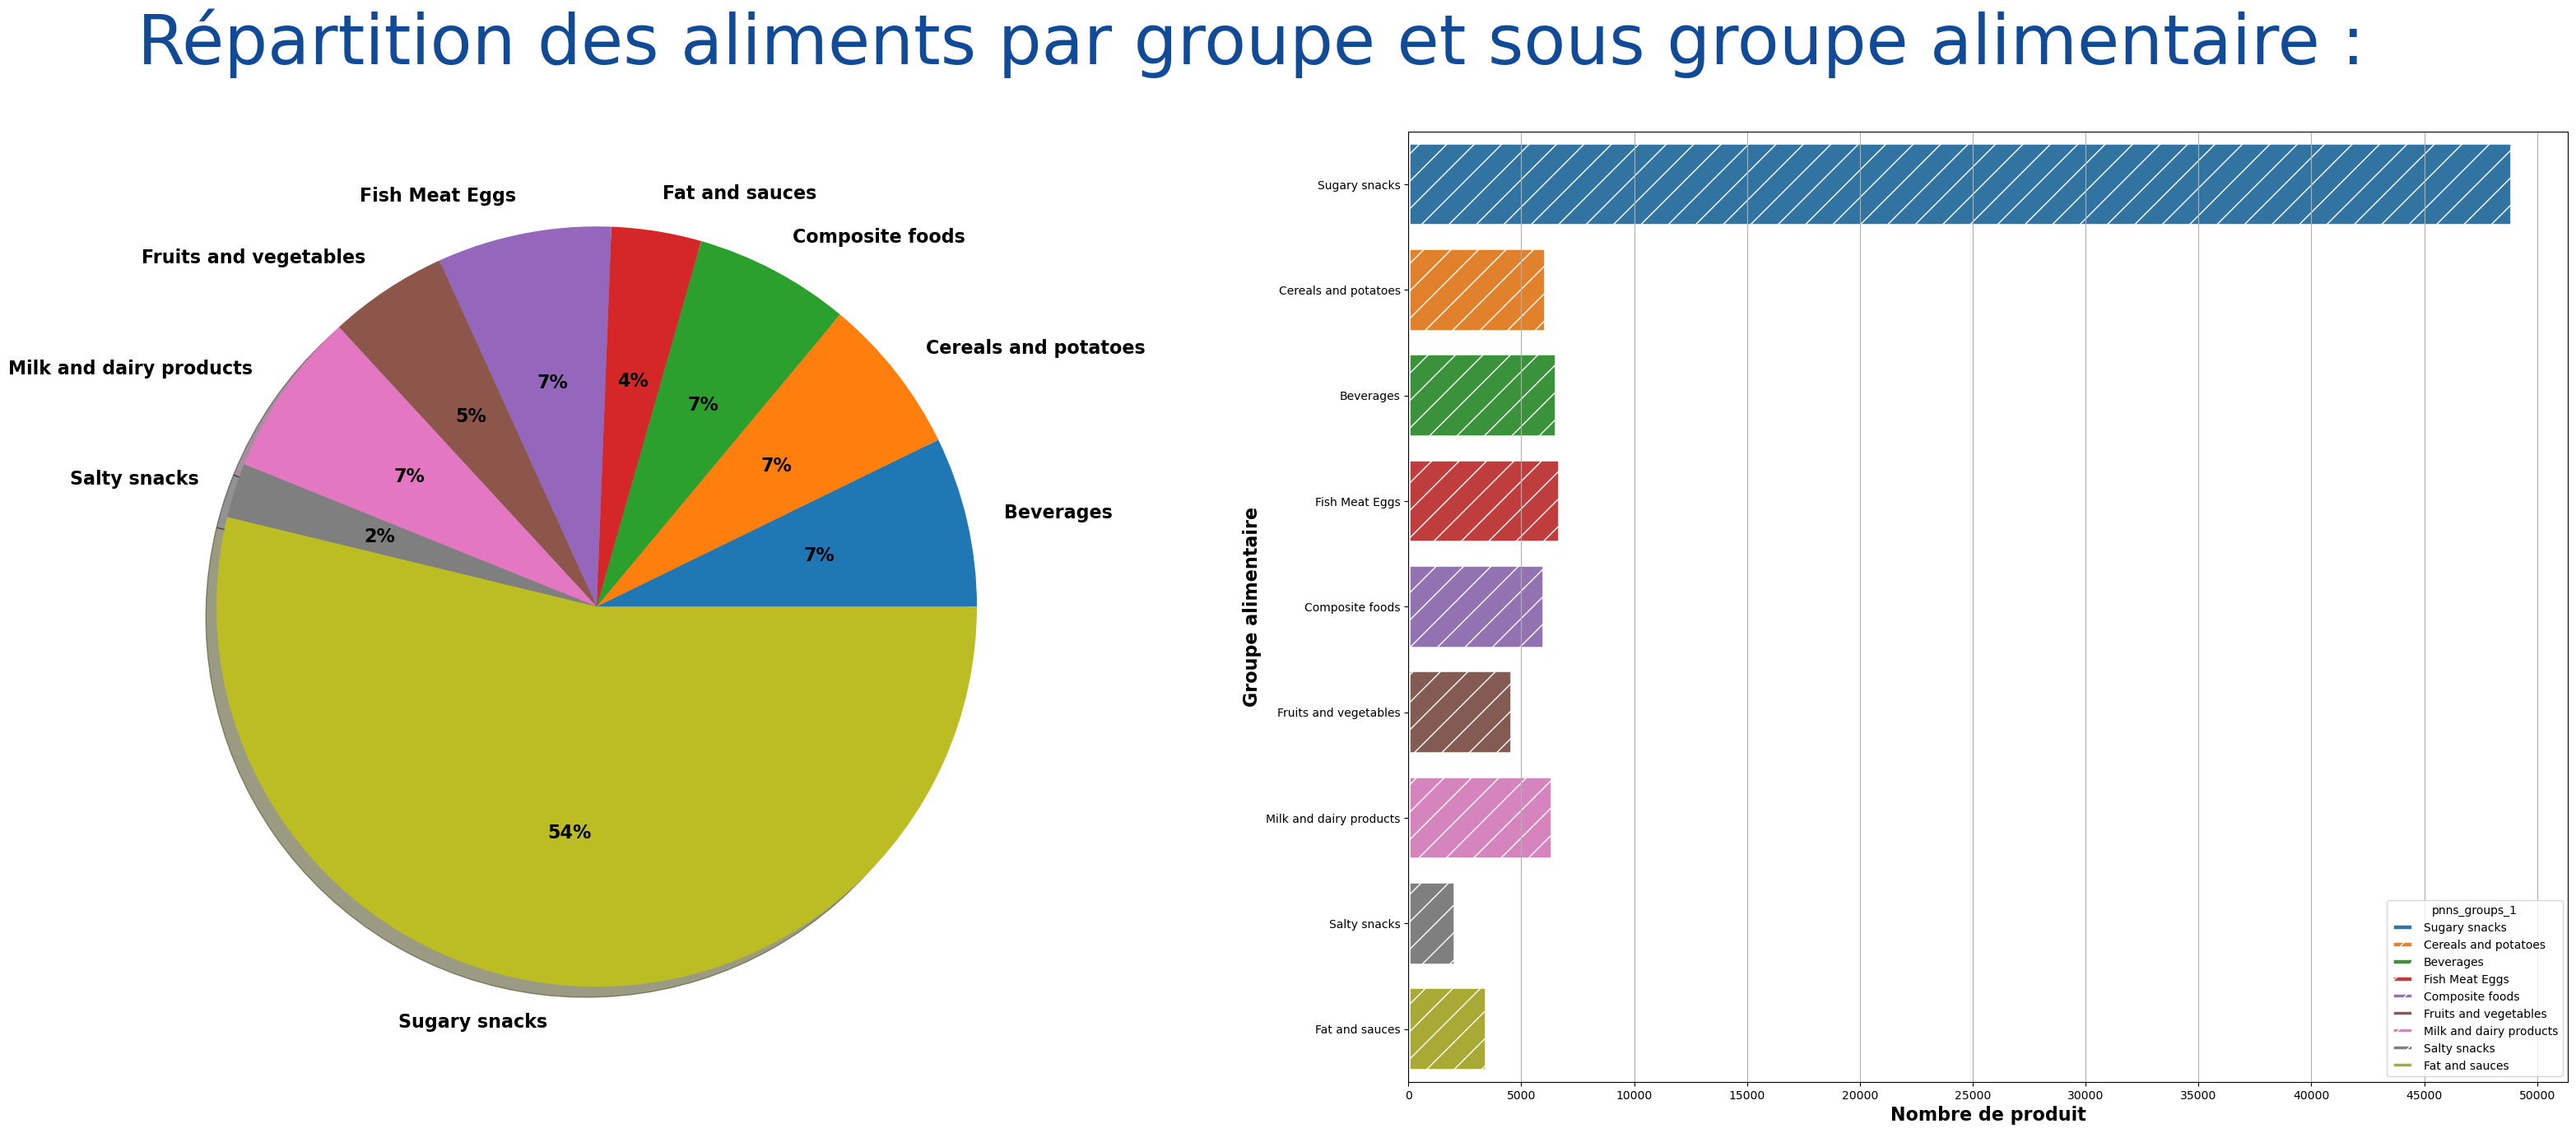

In [34]:
# Fréquence des aliments par groupe alimentaire
 # Propriétés graphiques de la figure principale
fig = plt.figure(figsize=(40, 15))
    
plt.suptitle("Répartition des aliments par groupe et sous groupe alimentaire :", size=60, fontdict=police_titre)
    
# Principales propriétés du camembert
pnns_groups_1 = leucinose.groupby(by="pnns_groups_1")['code'].nunique()
ax1 = plt.subplot(1,2,1)
ax1 = plt.pie(pnns_groups_1, labels=pnns_groups_1.index,
        startangle=0, 
        shadow=True,
        autopct='%1.f%%',
        textprops=dict(color="black",size=16, weight="bold"))

# Principales propriétés du diagramme en batôn
ax2 = plt.subplot(1,2,2)
    
# Tracer des graphiques

ax2 = sns.countplot(y=leucinose["pnns_groups_1"], hue=leucinose["pnns_groups_1"],
                    dodge=False, lw=4, ec="white", hatch="/")
plt.xlabel("Nombre de produit", size=16, fontweight="bold")
plt.ylabel("Groupe alimentaire", size=16, fontweight="bold")
plt.grid(axis="x")
plt.xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

54% des aliments appartiennent à la catégorie des snacks sucrés. C'est sans doute pour cette raison que nous avons 45% des produits notés nutriscore E.<br>
En effet, les snacks sucrés sont riches en glucides, ce qui est à réduire dans le cadre d'une alimentation saine, tel que définit par le nutriscore.<br>
Les catégories viandes/poissons/oeufs et produits laitiers ne contient que 14% des aliments. C'est dans ces catégories que l'on retrouve la majorité des aliments riches en protéines. 

##### Sous-groupe alimentaire (pnns_groups_2)

In [35]:
# Harmonisation des caractères 
leucinose["pnns_groups_2"] = leucinose["pnns_groups_2"].str.lower().str.replace('-', ' ')

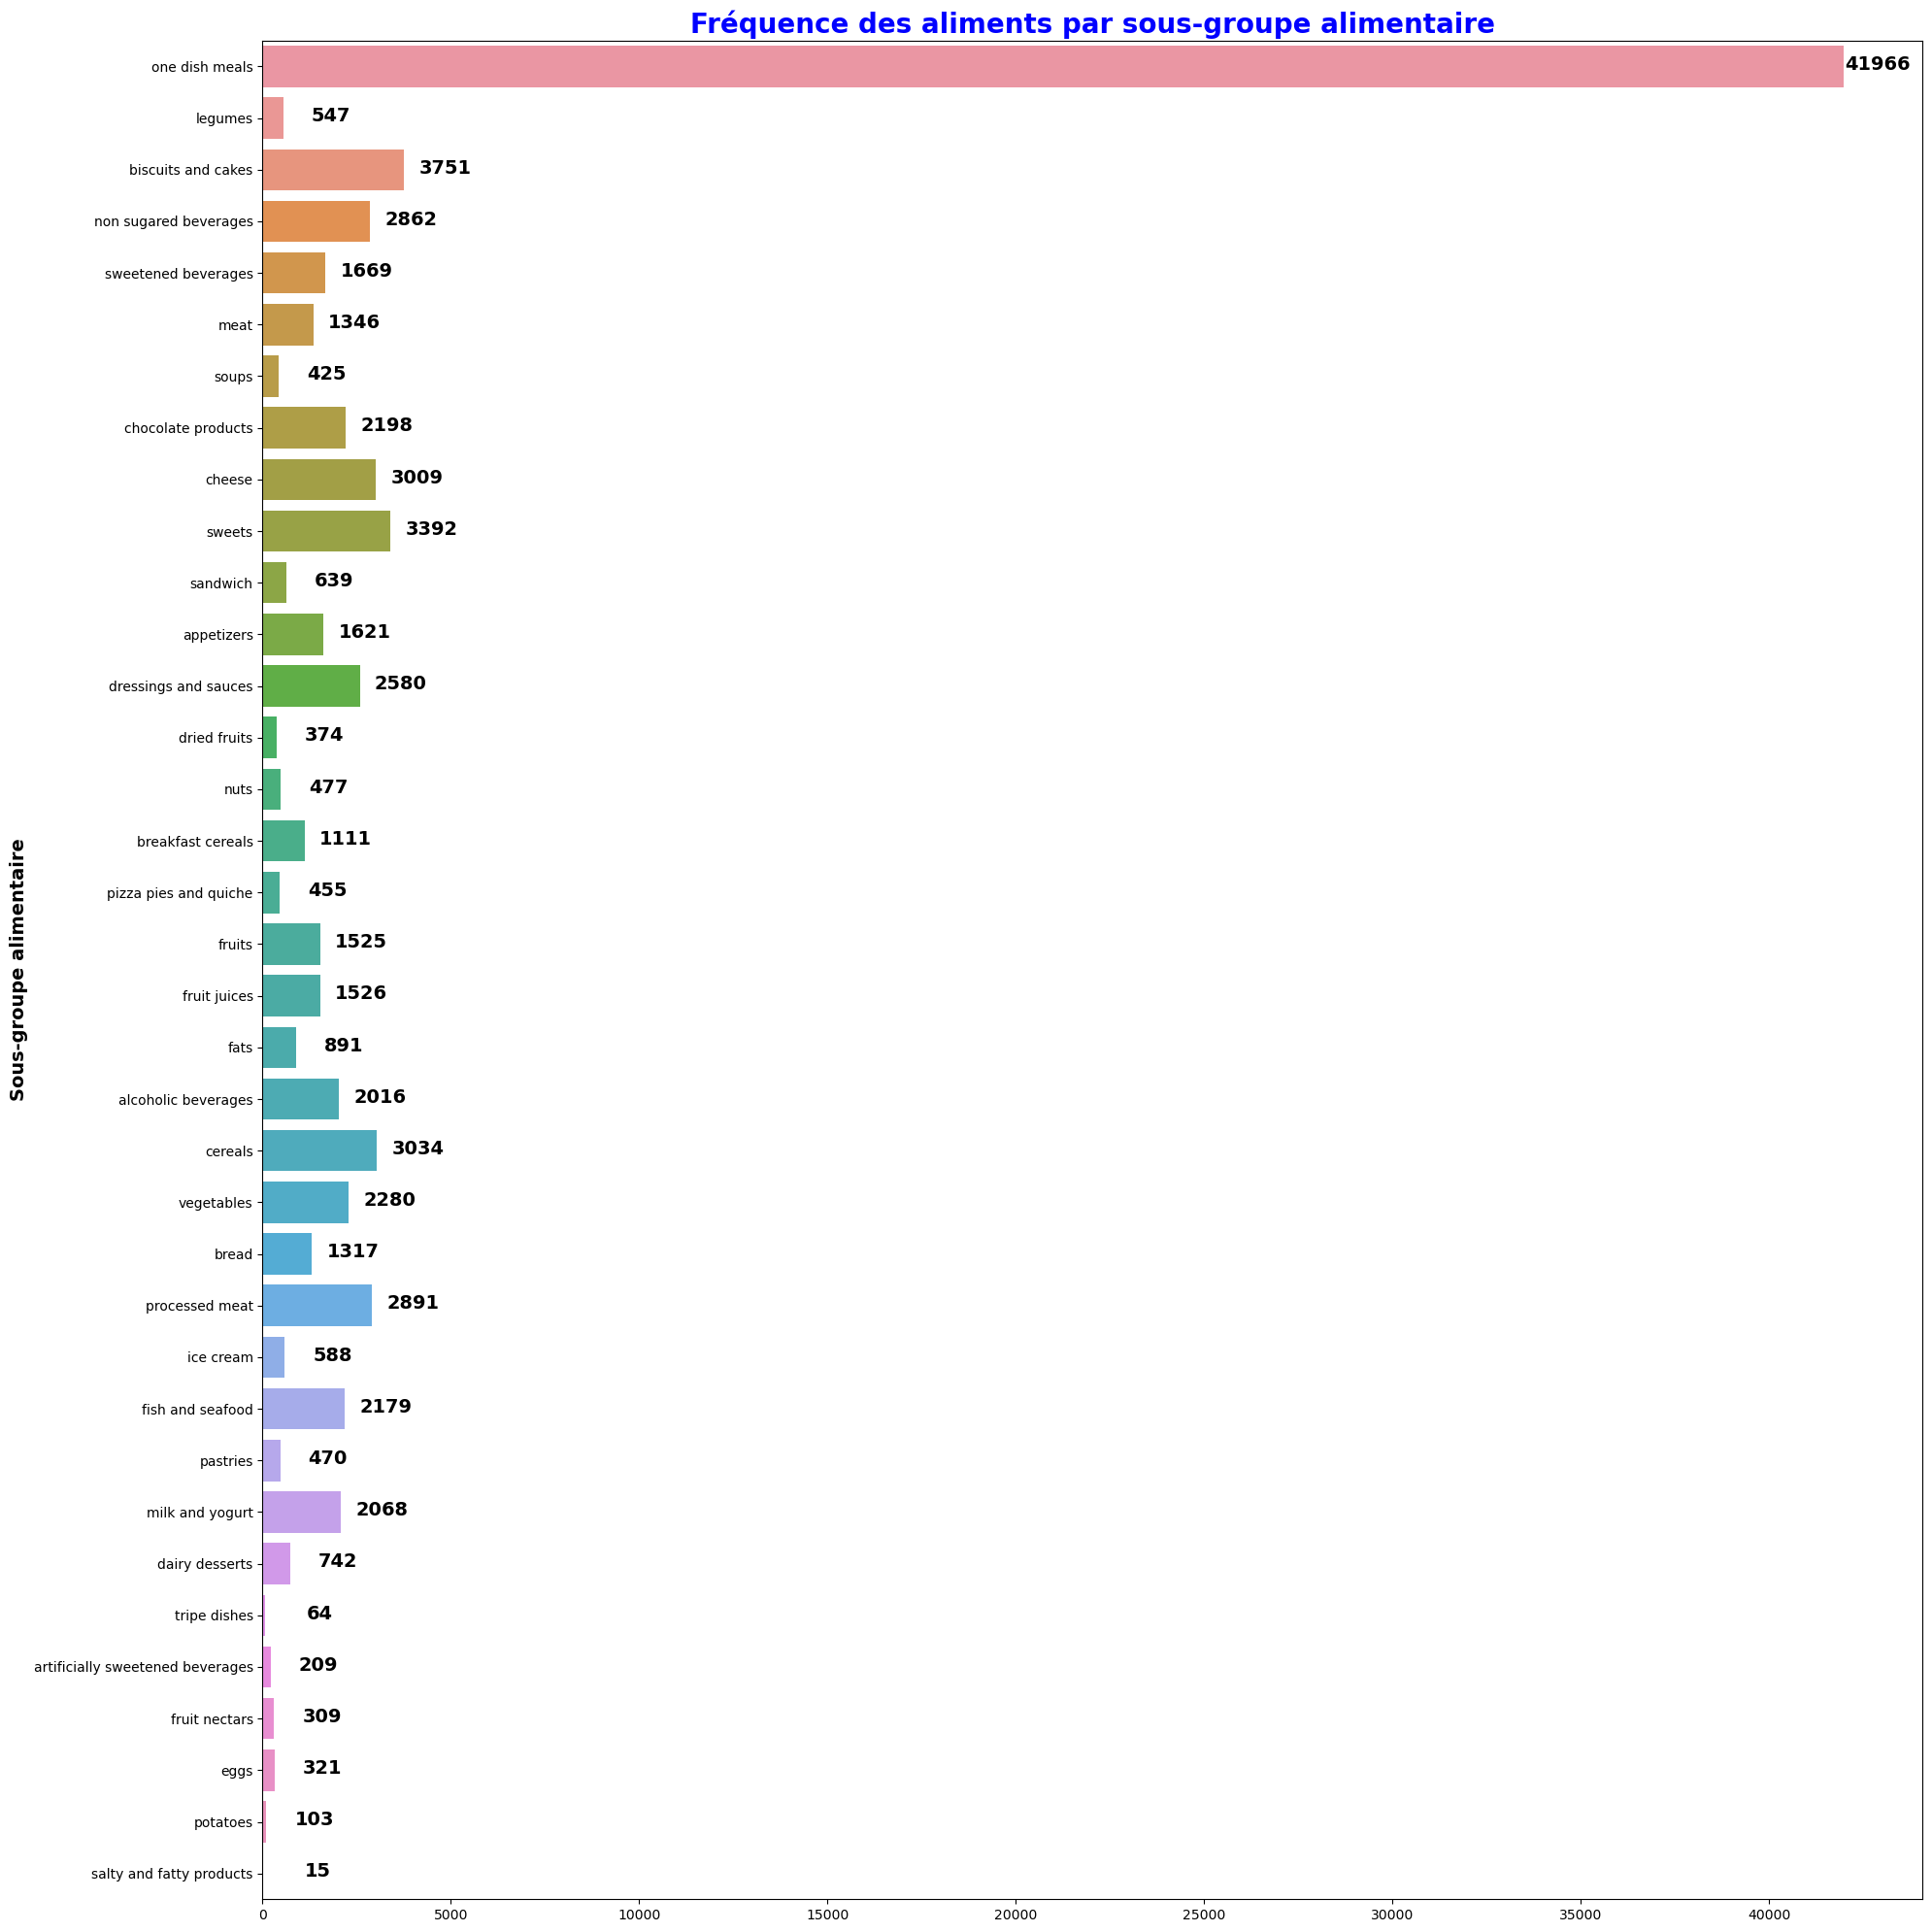

In [36]:
# Fréquence des aliments par sous-groupe alimentaire
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

df = leucinose

ax = sns.countplot(y=leucinose["pnns_groups_2"], data=df)
plt.xlabel("")
plt.ylabel("Sous-groupe alimentaire", fontsize=14, fontweight="bold")
plt.title("Fréquence des aliments par sous-groupe alimentaire", fontsize=20, fontweight="bold", color="blue")
for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(50, -18),fontsize=14, fontweight="bold", color='black',textcoords='offset points', horizontalalignment='right')

plt.show()

Les produits alimentaires les plus largement représentés sont les repas complets ("one dish meals"), une sous-catégorie de "sugary_snack". On peut penser que les consommateurs sont essentiellement des personnes qui, pour plusieurs raisons, ne cuisine pas énormément ;

#### Les variables qualitatives nominales
Ici, je souhaite regarder les valeurs les plus représentées. Je vais me servir de l'outil de visualisation du nuage des mots (WordCloud) auquel je vais associer le tracer de l'histogramme pour chaque variable.

In [37]:
# Importation de la librairie de visualisation du nuage des mots
from wordcloud import WordCloud

In [38]:
# Définition de la fonction pour la visualisation graphique

def analyse(dataframe, variable, nom, nuage=True, histogramme=True, frequence=True, nb_lignes=10):
    
    # Préparation des variables de travail
    dico = dataframe.groupby(variable)[variable].count().sort_values(ascending=False).to_dict()
    col1 = nom
    col2 = 'Quantité'
    col3 = 'Fréquence (%)'
    df_gpe = pd.DataFrame(dico.items(), columns=[col1, col2])
    df_gpe[col3] = (df_gpe[col2] * 100) / len(dataframe)
    df_gp_red = df_gpe.head(nb_lignes)
    
    plt.suptitle("Répartition des aliments par groupe et sous groupe alimentaire :", size=30, fontdict=police_titre)

    if nuage:
        # affiche du nuage des mots
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color="white",
            max_words=100).generate_from_frequencies(dico)
        plt.figure(figsize=(8, 8))
        plt.title("Nuage des mots des " + nom, fontsize=14, fontweight="bold", color="red")
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

    if histogramme:
        # Affichage de l'histogramme
        sns.set_style("whitegrid")
        plt.figure(figsize=(8, 4))
        sns.barplot(
            y=df_gp_red[col1],
            x=df_gp_red[col3],
            data=df_gp_red,
            color='#ff9f9b')
        plt.title("Répartition du nombre des " + nom, fontsize=14, fontweight="bold", color="red")
        plt.grid(False)
        plt.tight_layout()
        plt.show()

    if frequence:
        # affichage du tableau des fréquences
        display(df_gp_red.style.hide(axis="index"))

##### Liste des additifs (Additives_fr)

<Figure size 2000x2000 with 0 Axes>

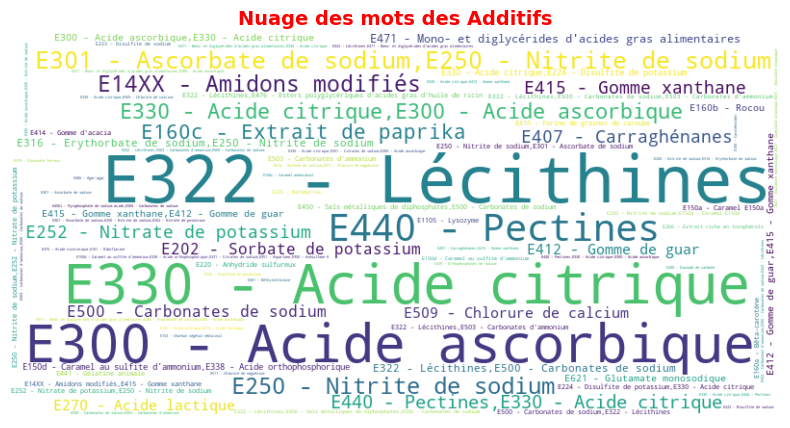

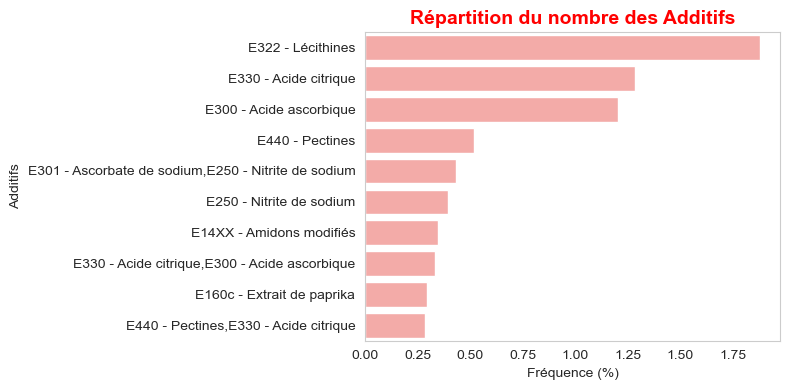

In [39]:
analyse(leucinose, "additives_fr", "Additifs", nb_lignes=10)

Les 5 additifs les plus utilisés par les industriels sont la lécithines, l'acide ascorbique, l'acide citrique, les pectines et le nitrite de sodium.<br> A noter que le nitrite de sodium est classé "rouge", car dangeureux pour la santé. <br> Recherchons la présence des autres additifs potentiellement dangereux pour la santé.

In [40]:
# Somme d'apparition des 20 additifs reconnus comme les très toxiques
leucinose["additives_fr"].str.contains("E102|E104|E110|E120|E124|E129|E150c|E150d|E210|E211|E212|E213|E249|E250|E251|E252|E284|E285|E320", regex=True).sum()

6587

Au moins un des vingt additifs les plus dangereux pour la santé est présent dans 6587 produits (soit environ 7% des produits représentés).

In [41]:
# Somme d'apparition des additifs reconnus comme toxiques
leucinose["additives_fr"].str.contains("E120|E123|E131|E171|E319|E338|E339|E340|E341|E343|E432|E433|E434|E435|E436|E442|E450|E451|E452|E466|E468|E469|E471|E472b|E472c|E472d|E472e|E472f|E473|E474|E475|E476|E477|E479b|E481|E482|E491|E492|E493|E494|E495|E520|E522|E523|E541|E551|E552|E553b|E554|E555|E620|E621|E622|E623|E624|E625|E950|E951|E952|E954|E955|E962|E1410|E1412|E1413|E1414|E1442|E1452", regex=True).sum()

10617

Au moins un additifs reconnus comme dangereux pour la santé est présent dans 10617 produits (soit environ 12% des produits représentés).

In [42]:
# Somme d'apparition des additifs reconnus comme cacérigènes
leucinose.dropna()["additives_fr"].str.contains("E104|E950|E249|E250|E251|E214|E215|E216|E217|E218|E219|E131|E132|E133|E249", regex=True).sum()

3850

Au moins un additifs reconnus comme cacérigènes est présent dans 4930 produits (soit environ 5% des produits représentés).

In [43]:
# Somme d'apparition des additifs à éviter pour les organismes fragilisés comme c'est le cas des personnes atteintes de leucinose
leucinose.dropna()["additives_fr"].str.contains("E952|E954|E950|E951|E955|E969", regex=True).sum()

697

848 produits contiennent au moins un additif fortement déconseillé pour les personnes atteintes de leucinose.

##### Nom des produits (variable product_name)

Quels sont les aliments les plus recherchés par les consommateurs?

<Figure size 2000x2000 with 0 Axes>

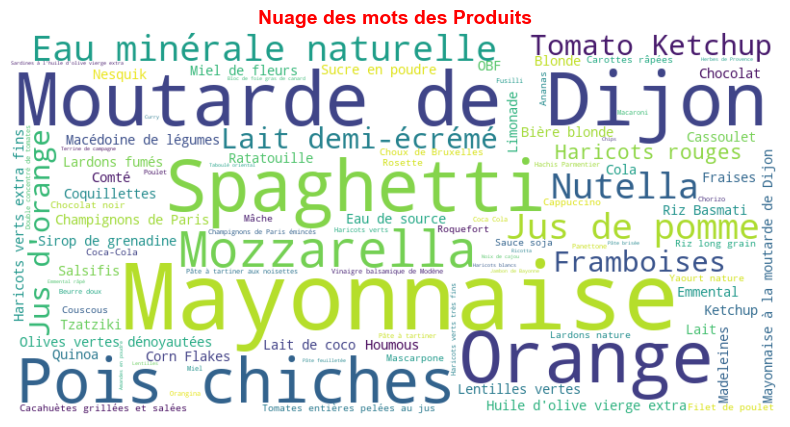

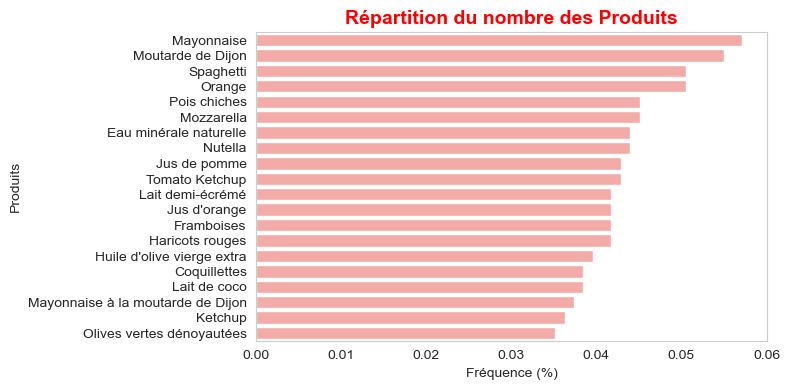

In [44]:
analyse(leucinose, "product_name", "Produits", nb_lignes=20)

La fréquence d'apparition des produits alimentaires est très faible.

### Section 2 : analyses multivariées
#### 1. Analyse des  relations entre les variables qualitatives
Afin de comprendre les relations entre les variables qualitatives, j'utiliserais deux outils principaux le **coefficient V de Cramer** afin de mesurer l'intensité de la corrélation (si les variables sont corrélées).<br>
Interprétation du Cramer :
Plus V est proche de zéro, plus il y a indépendance entre les deux variables étudiées. Il vaut 1 en cas de complète dépendance.

##### 1.1. Analyse de la relation entre les groupes nutritionnels et le grade nutritionnel

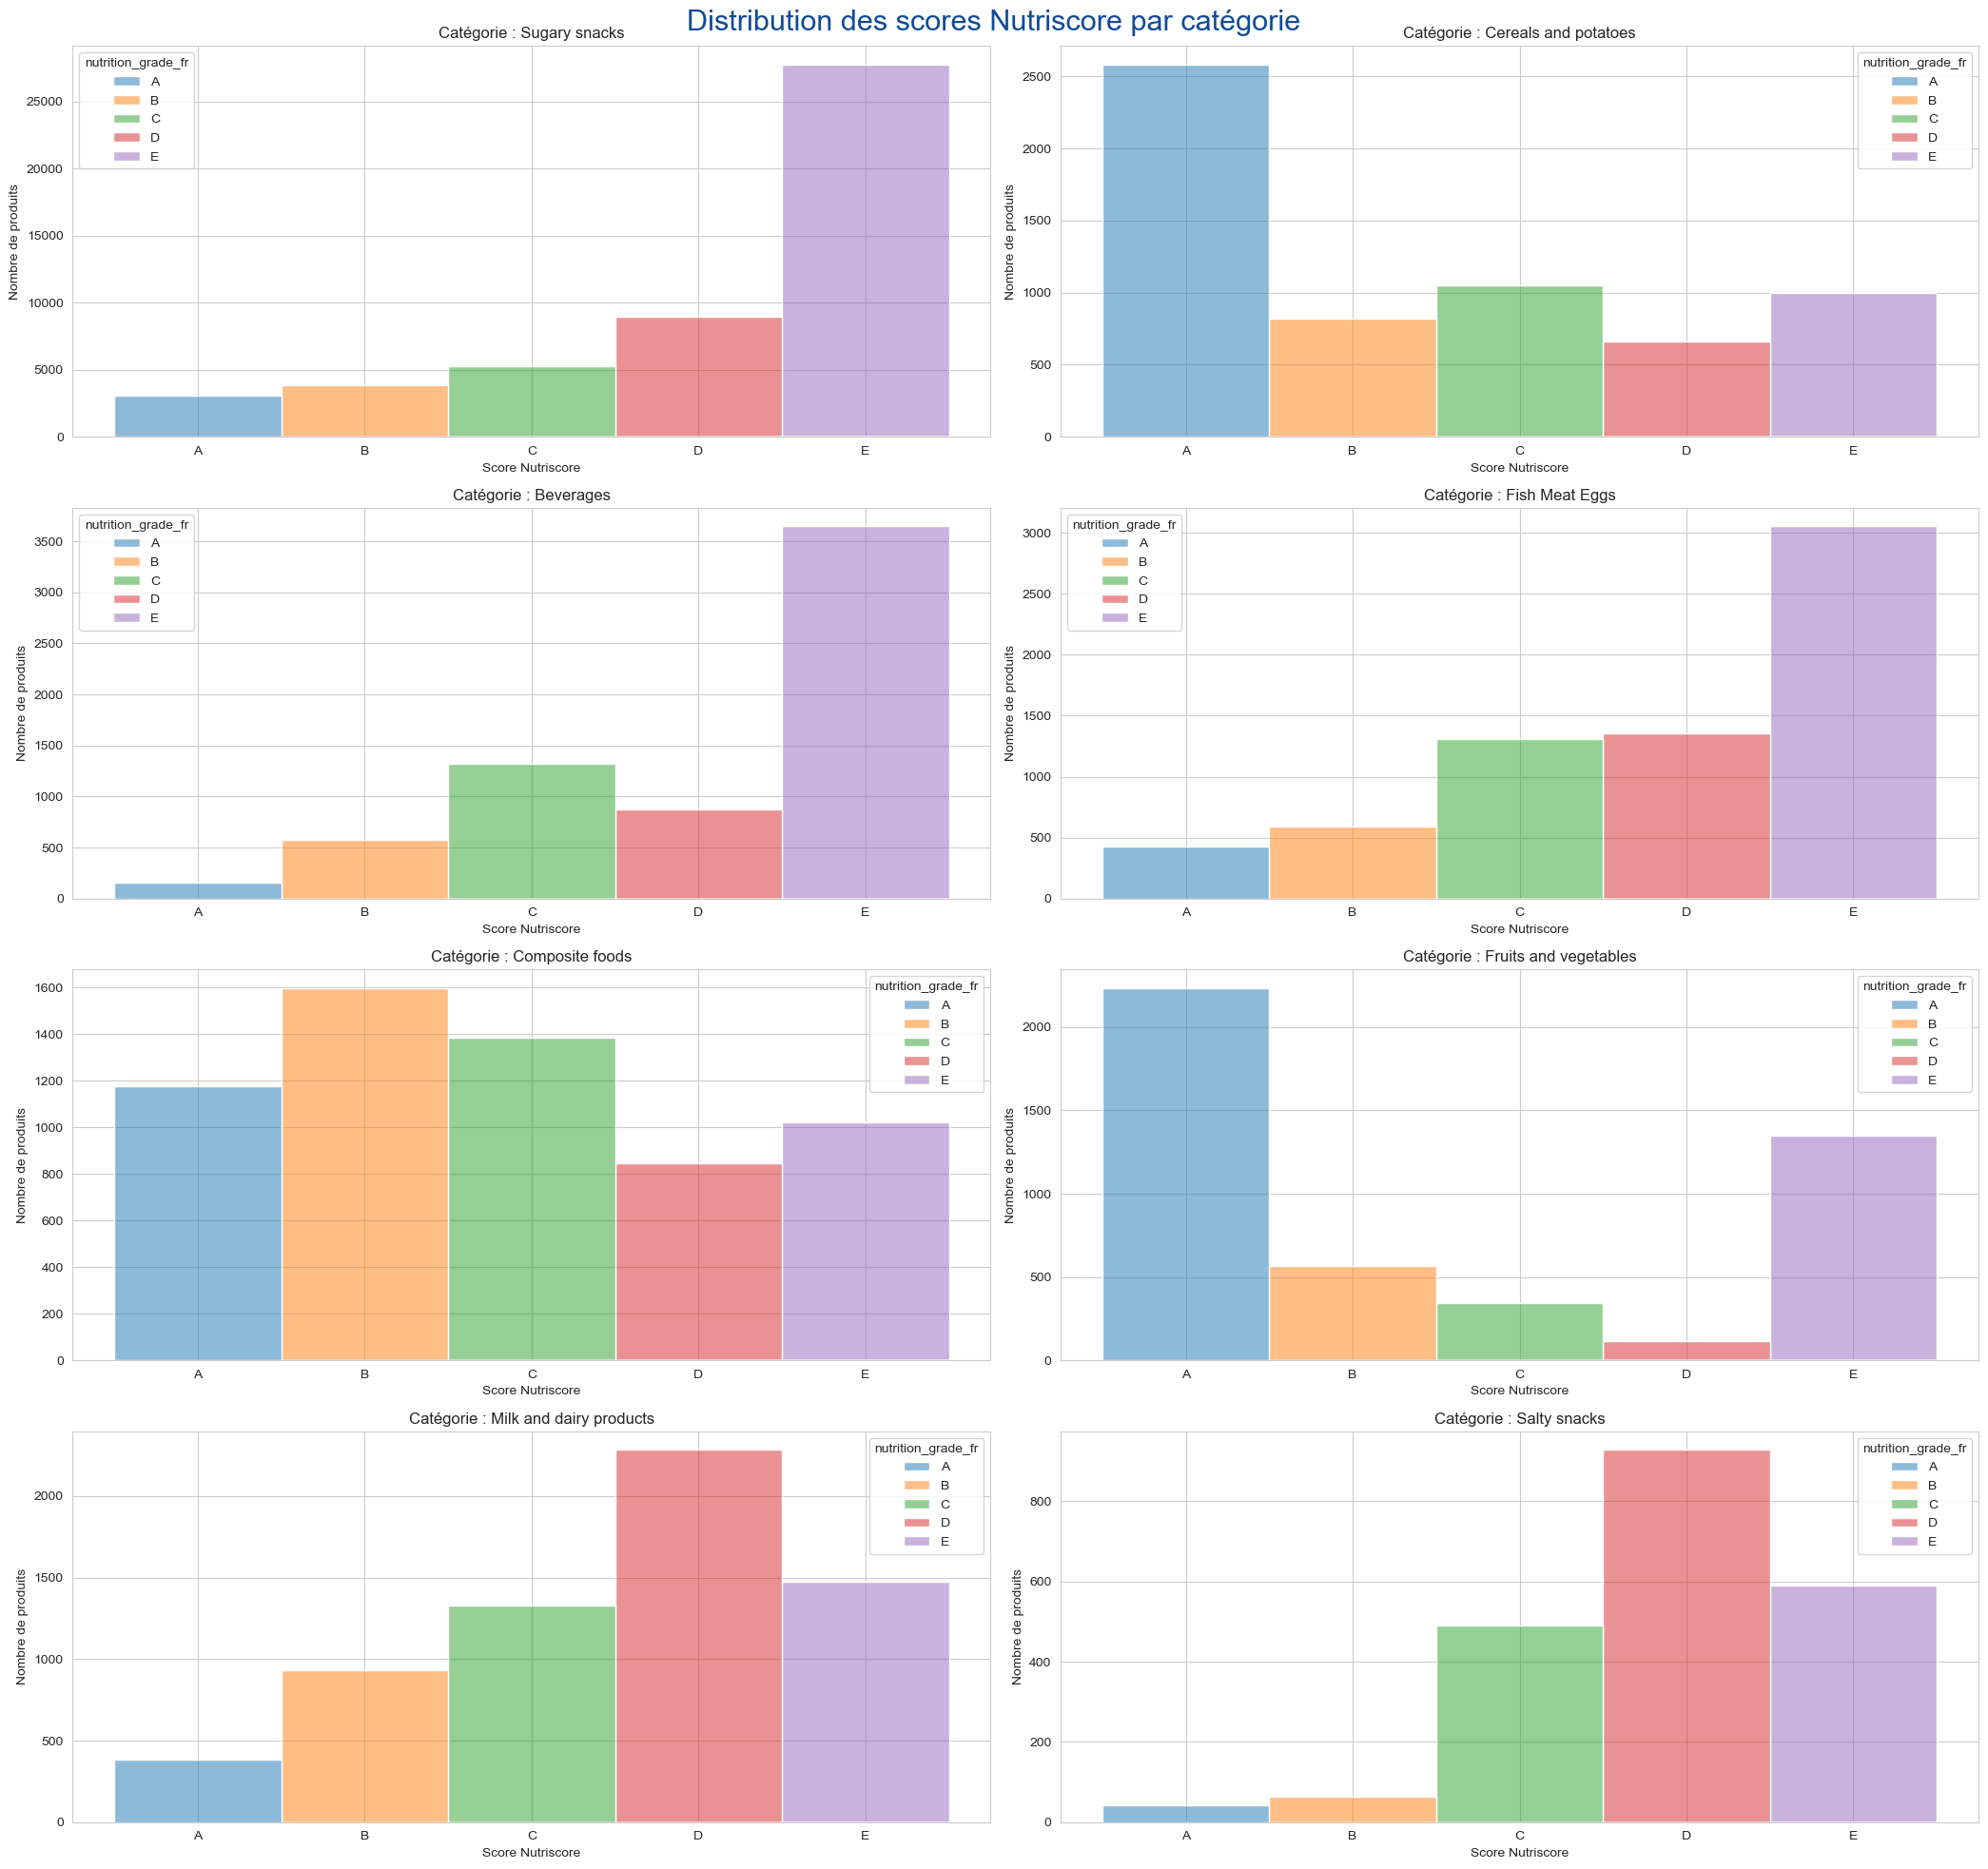

In [46]:
n_sub = len(leucinose["pnns_groups_1"].unique())
n_col = 2
fig, axes = plt.subplots(int(n_sub/n_col), n_col, sharex=False, sharey=False, figsize=(21,20))
axes = np.array(axes)
fig.suptitle("Distribution des scores Nutriscore par catégorie", fontdict=police_titre, size=22)
i=0
for ax in axes.reshape(-1):
    cat = leucinose['pnns_groups_1'].unique()[i]
    subset = leucinose[leucinose['pnns_groups_1']==cat].sort_values("nutrition_grade_fr")
    sns.histplot(data=subset, x="nutrition_grade_fr", hue="nutrition_grade_fr", ax=ax)
    ax.set_title('Catégorie : {}'.format(cat))
    ax.set_xlabel("Score Nutriscore")
    ax.set_ylabel("Nombre de produits")
    i+=1
plt.show()

Le grade nutritionnel varie en fonction des catégories. Cette observation laisse croire que les catégories influencent le nutriscore.<br>
Afin de vérifier cette hypothèse, nous pouvons réaliser le calcul du coefficient V de Cramer(comme précedemment).

In [47]:
ctab, chitest = rp.crosstab(leucinose["pnns_groups_1"], leucinose["nutrition_grade_fr"],
                                     margins = False, test="chi-square")

print(chitest)

                 Chi-square test     results
0  Pearson Chi-square ( 32.0) =   25306.5040
1                     p-value =       0.0000
2                  Cramer's V =       0.2637


Le coefficient V de Cramer est égal à 0,2637, ce qui illustre une faible association entre les catégories d'aliments et le nutrigrade. On peut supposer que cette observation est la même entre les sous-catégories et le nutriscore.

In [48]:
import researchpy as rp

ctab, chitest = rp.crosstab(leucinose["pnns_groups_2"], leucinose["nutrition_grade_fr"],
                                     margins = False, test="chi-square")

print(chitest)

                  Chi-square test     results
0  Pearson Chi-square ( 140.0) =   41229.8147
1                      p-value =       0.0000
2                   Cramer's V =       0.3366


Il y a bien une corrélation entre les sous-groupes alimentaires et le nutriscore. Et cette corrélation est plus forte qu'avec les groupes alimentaire.

##### 1.2. Analyse de la relation entre les groupes et sous-groupes nutritionnels
Comme on peut s'en douter, cette relation doit être forte. Mais vérifions la tout de même.

In [49]:
ctab, chitest = rp.crosstab(leucinose["pnns_groups_1"], leucinose["pnns_groups_2"],
                                     margins = False, test="chi-square")

print(chitest)

                  Chi-square test      results
0  Pearson Chi-square ( 280.0) =   653969.4901
1                      p-value =        0.0000
2                   Cramer's V =        0.9479


Le coefficient de Cramer est presque égal à 1. Ce qui confirme que les deux variables sont fortement corrélées.

#### 2. Analyse des  relations entre les variables quantitatives

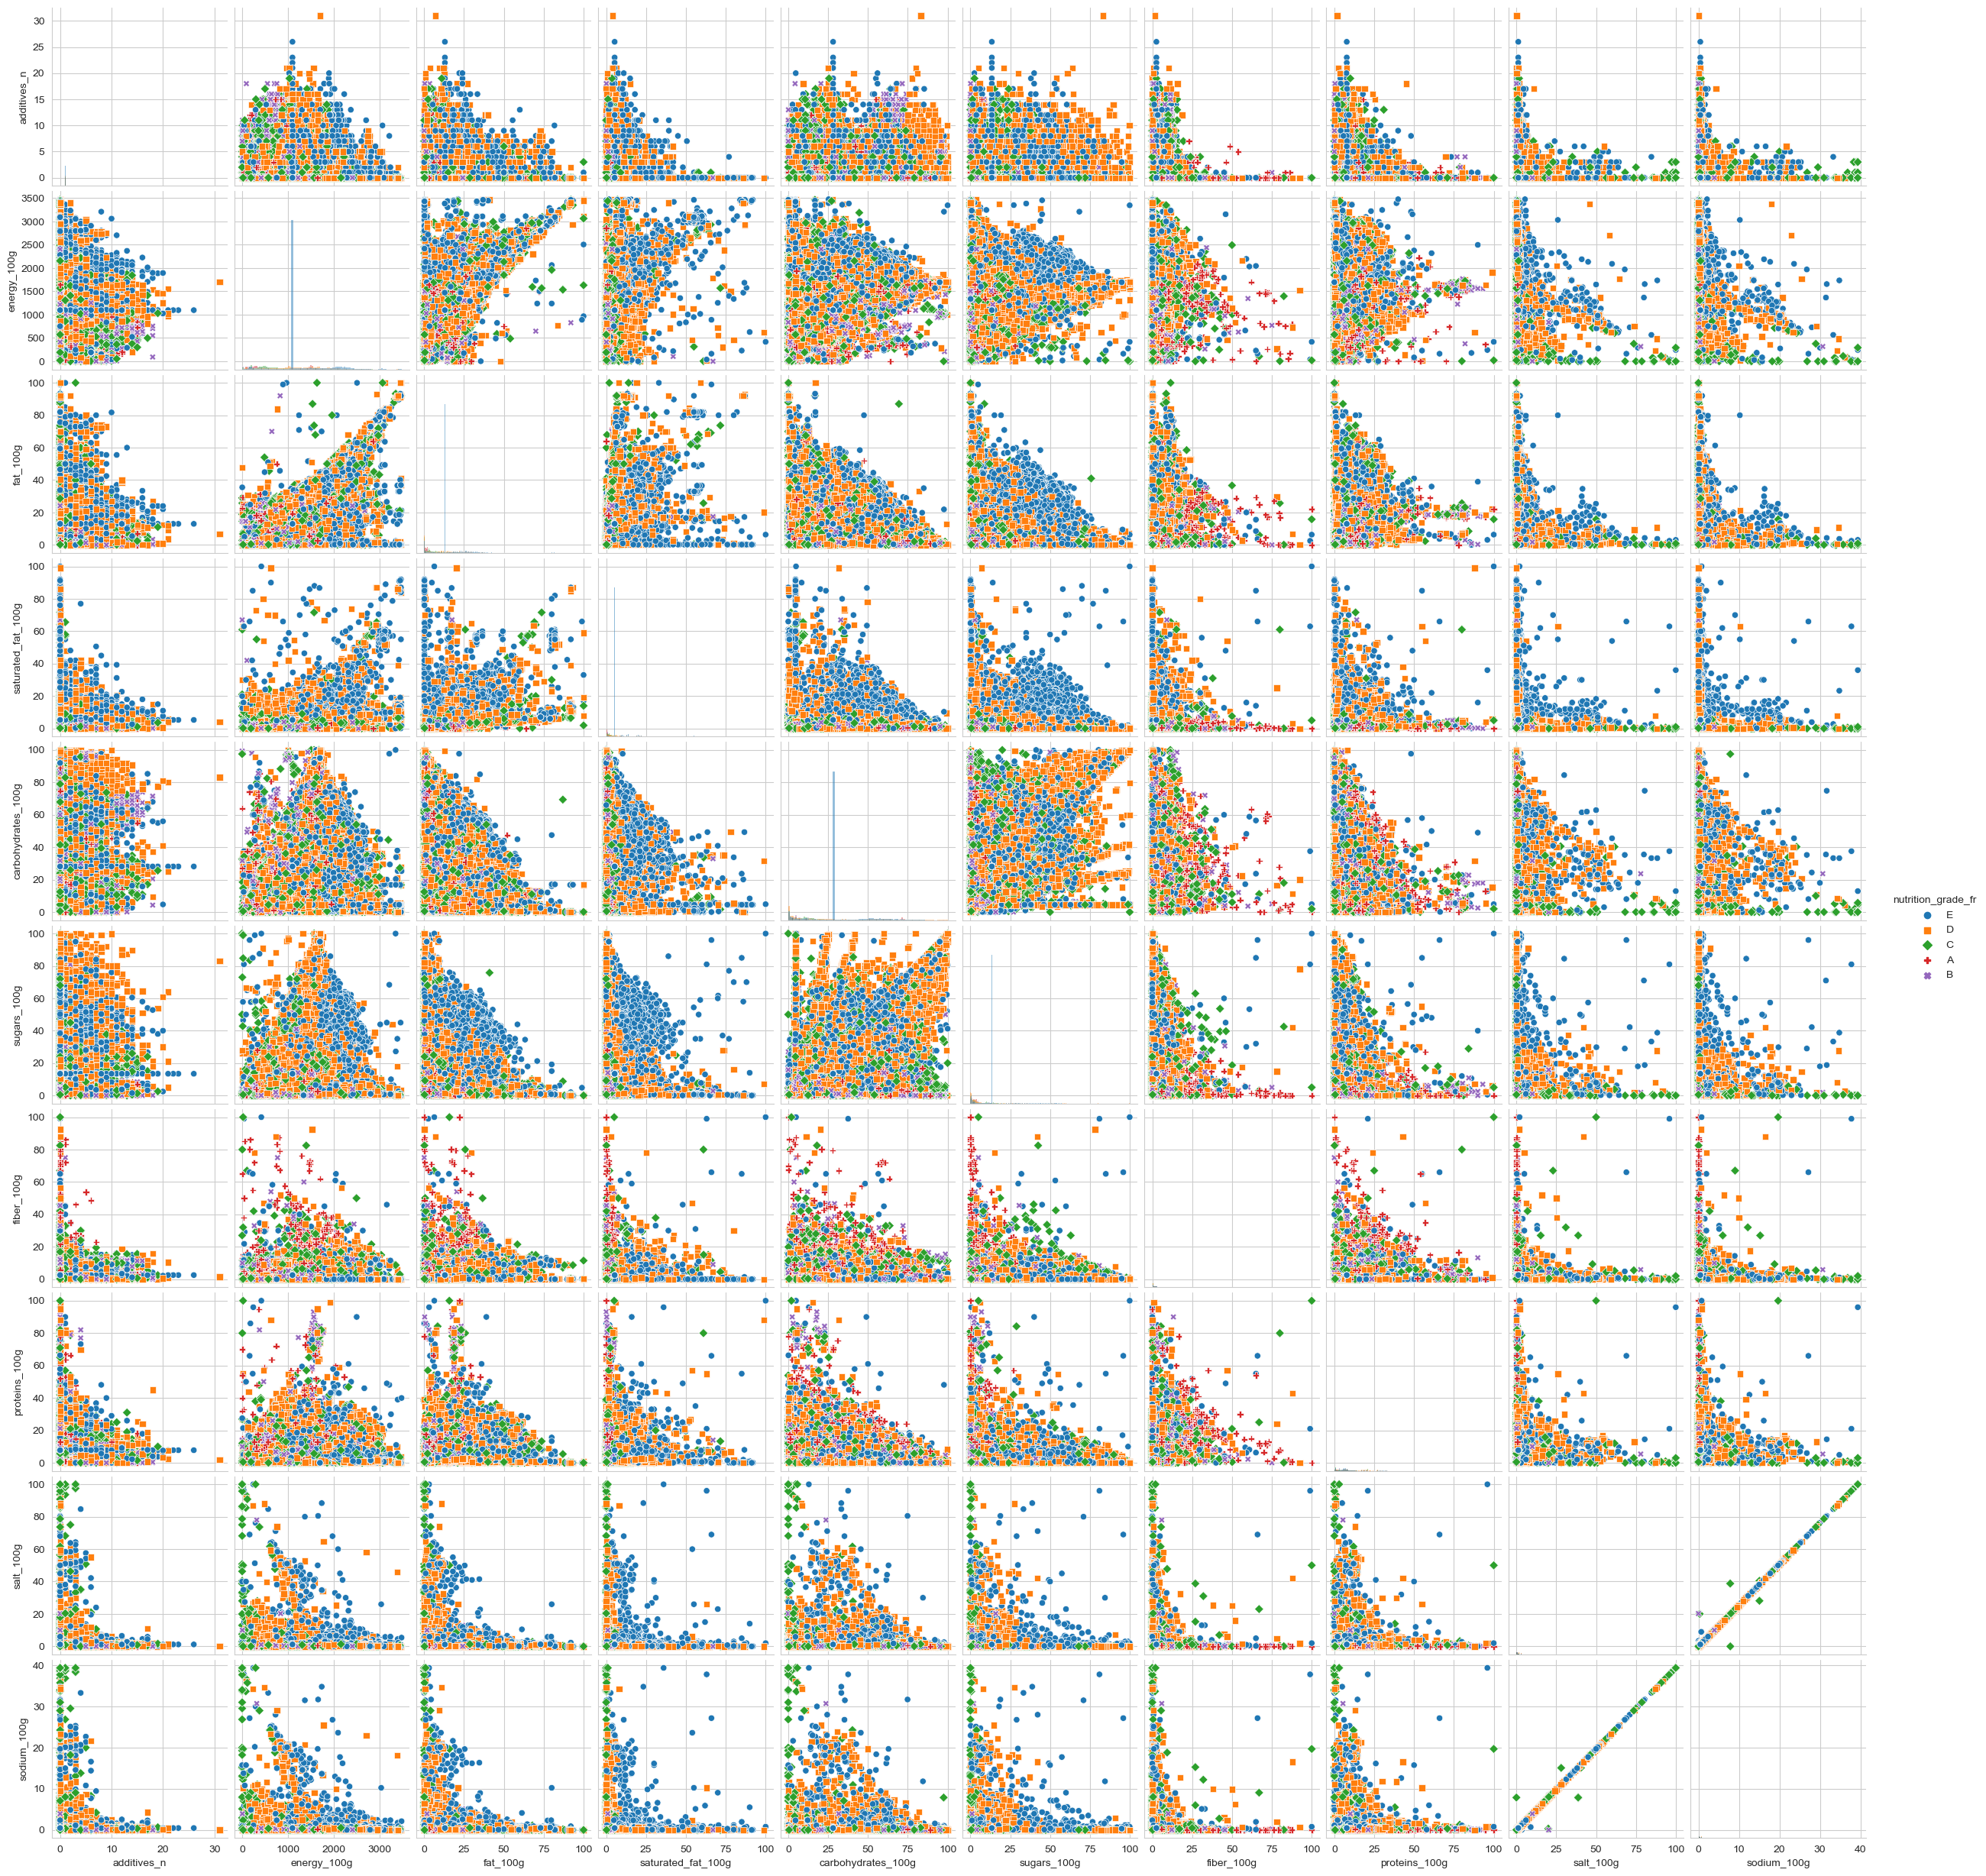

In [50]:
# Observation des variables par paire
sns.pairplot(leucinose, hue="nutrition_grade_fr", diag_kind="hist", markers=["o", "s", "D", "P", "X"])

L'observation de ces pairplots montre déjà des relations linéaires positives entre certaines variables. On remarque également le regroupement par Nutrigrade sur la plupart des features.

**_L'analyse de la présence ou l'absence d'une relation linéaire entre les variables quantitatifs se fera à l'aide du coefficient de corrélation de Pearson._**

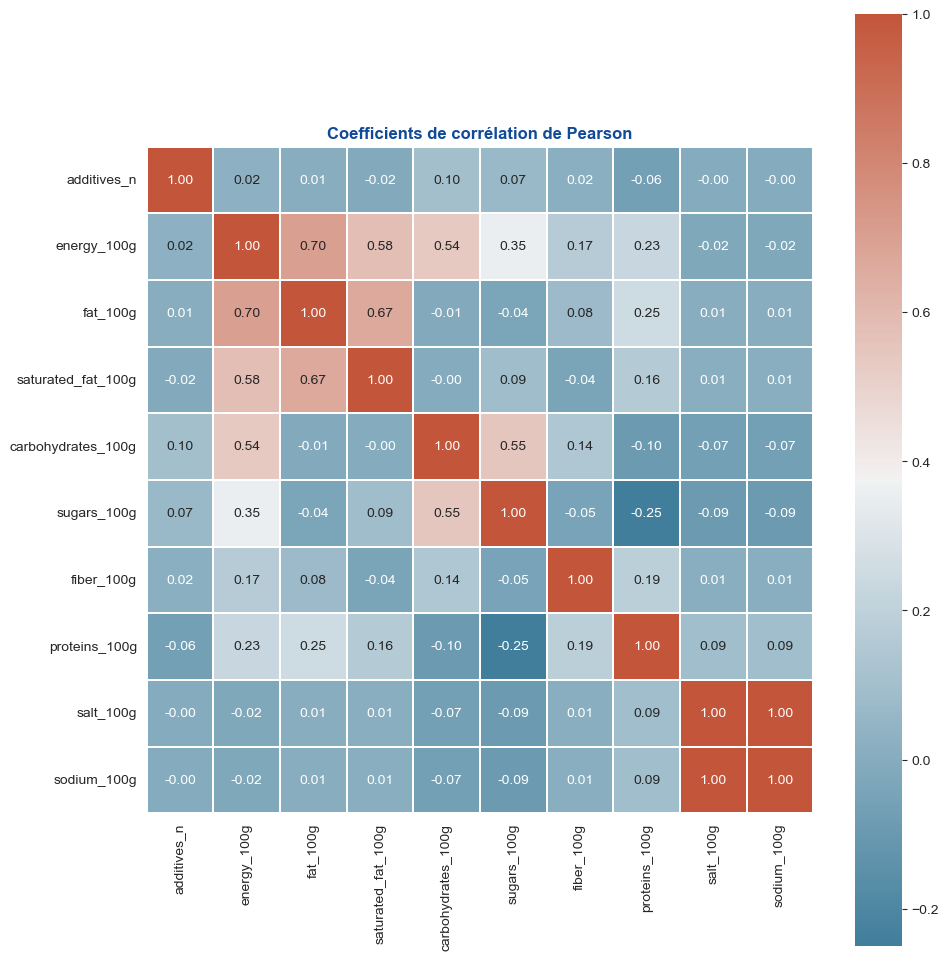

In [51]:
# Réalisation du test de corrélation de Pearson et affichage ses résultats dans un heatmap

#Matrice des corrélations
corr = leucinose.corr()

#heatmap
fig = plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, linewidths=0.01, annot=True, cmap=cmap, fmt='.2f')
plt.title("Coefficients de corrélation de Pearson", fontdict=police_titre)
plt.show()

Les cellules aux couleurs rouges et roses traduisent des corrélations linéaires fortes entre les variables représentées :
- La variable énergie est fortement corrélée (de manière positive) avec les variables relatives aux lipides et glucides, et très faiblement avec la variable protéine : plus la teneur en lipides et/ou glucides d'un produit augmente, plus la valeur énergetique de ce produit est important ; 
- On observe aucune corrélation entre les additifs et les nutriments. L'ajout d'additifs dans un produit ne dépend donc pas de la composition nutritionnelle de ce dernier ;
- Les protéines sont très faiblement corréles aux lipides. Plus la teneur en lipides est élevée, la teneur en protéines augmentent très faiblement ou inversement ;
- Les protéines sont négativement corrélées aux glucides : les produits à forte teneur en protéines ont une tendance à contenir moins de glucides et inversement ;
- La variable sel est très fortement corrélé avec sodium.

#### 3. Analyse des  relations entre les variables quantitatives et qualitatives
#### 3.1. Analyse du "nutrition_grade_fr" et les valeurs nutritionnelles
A l'aide des boîtes à moustache, observons la distribution des nutriments en fonction du grade nutritionnel

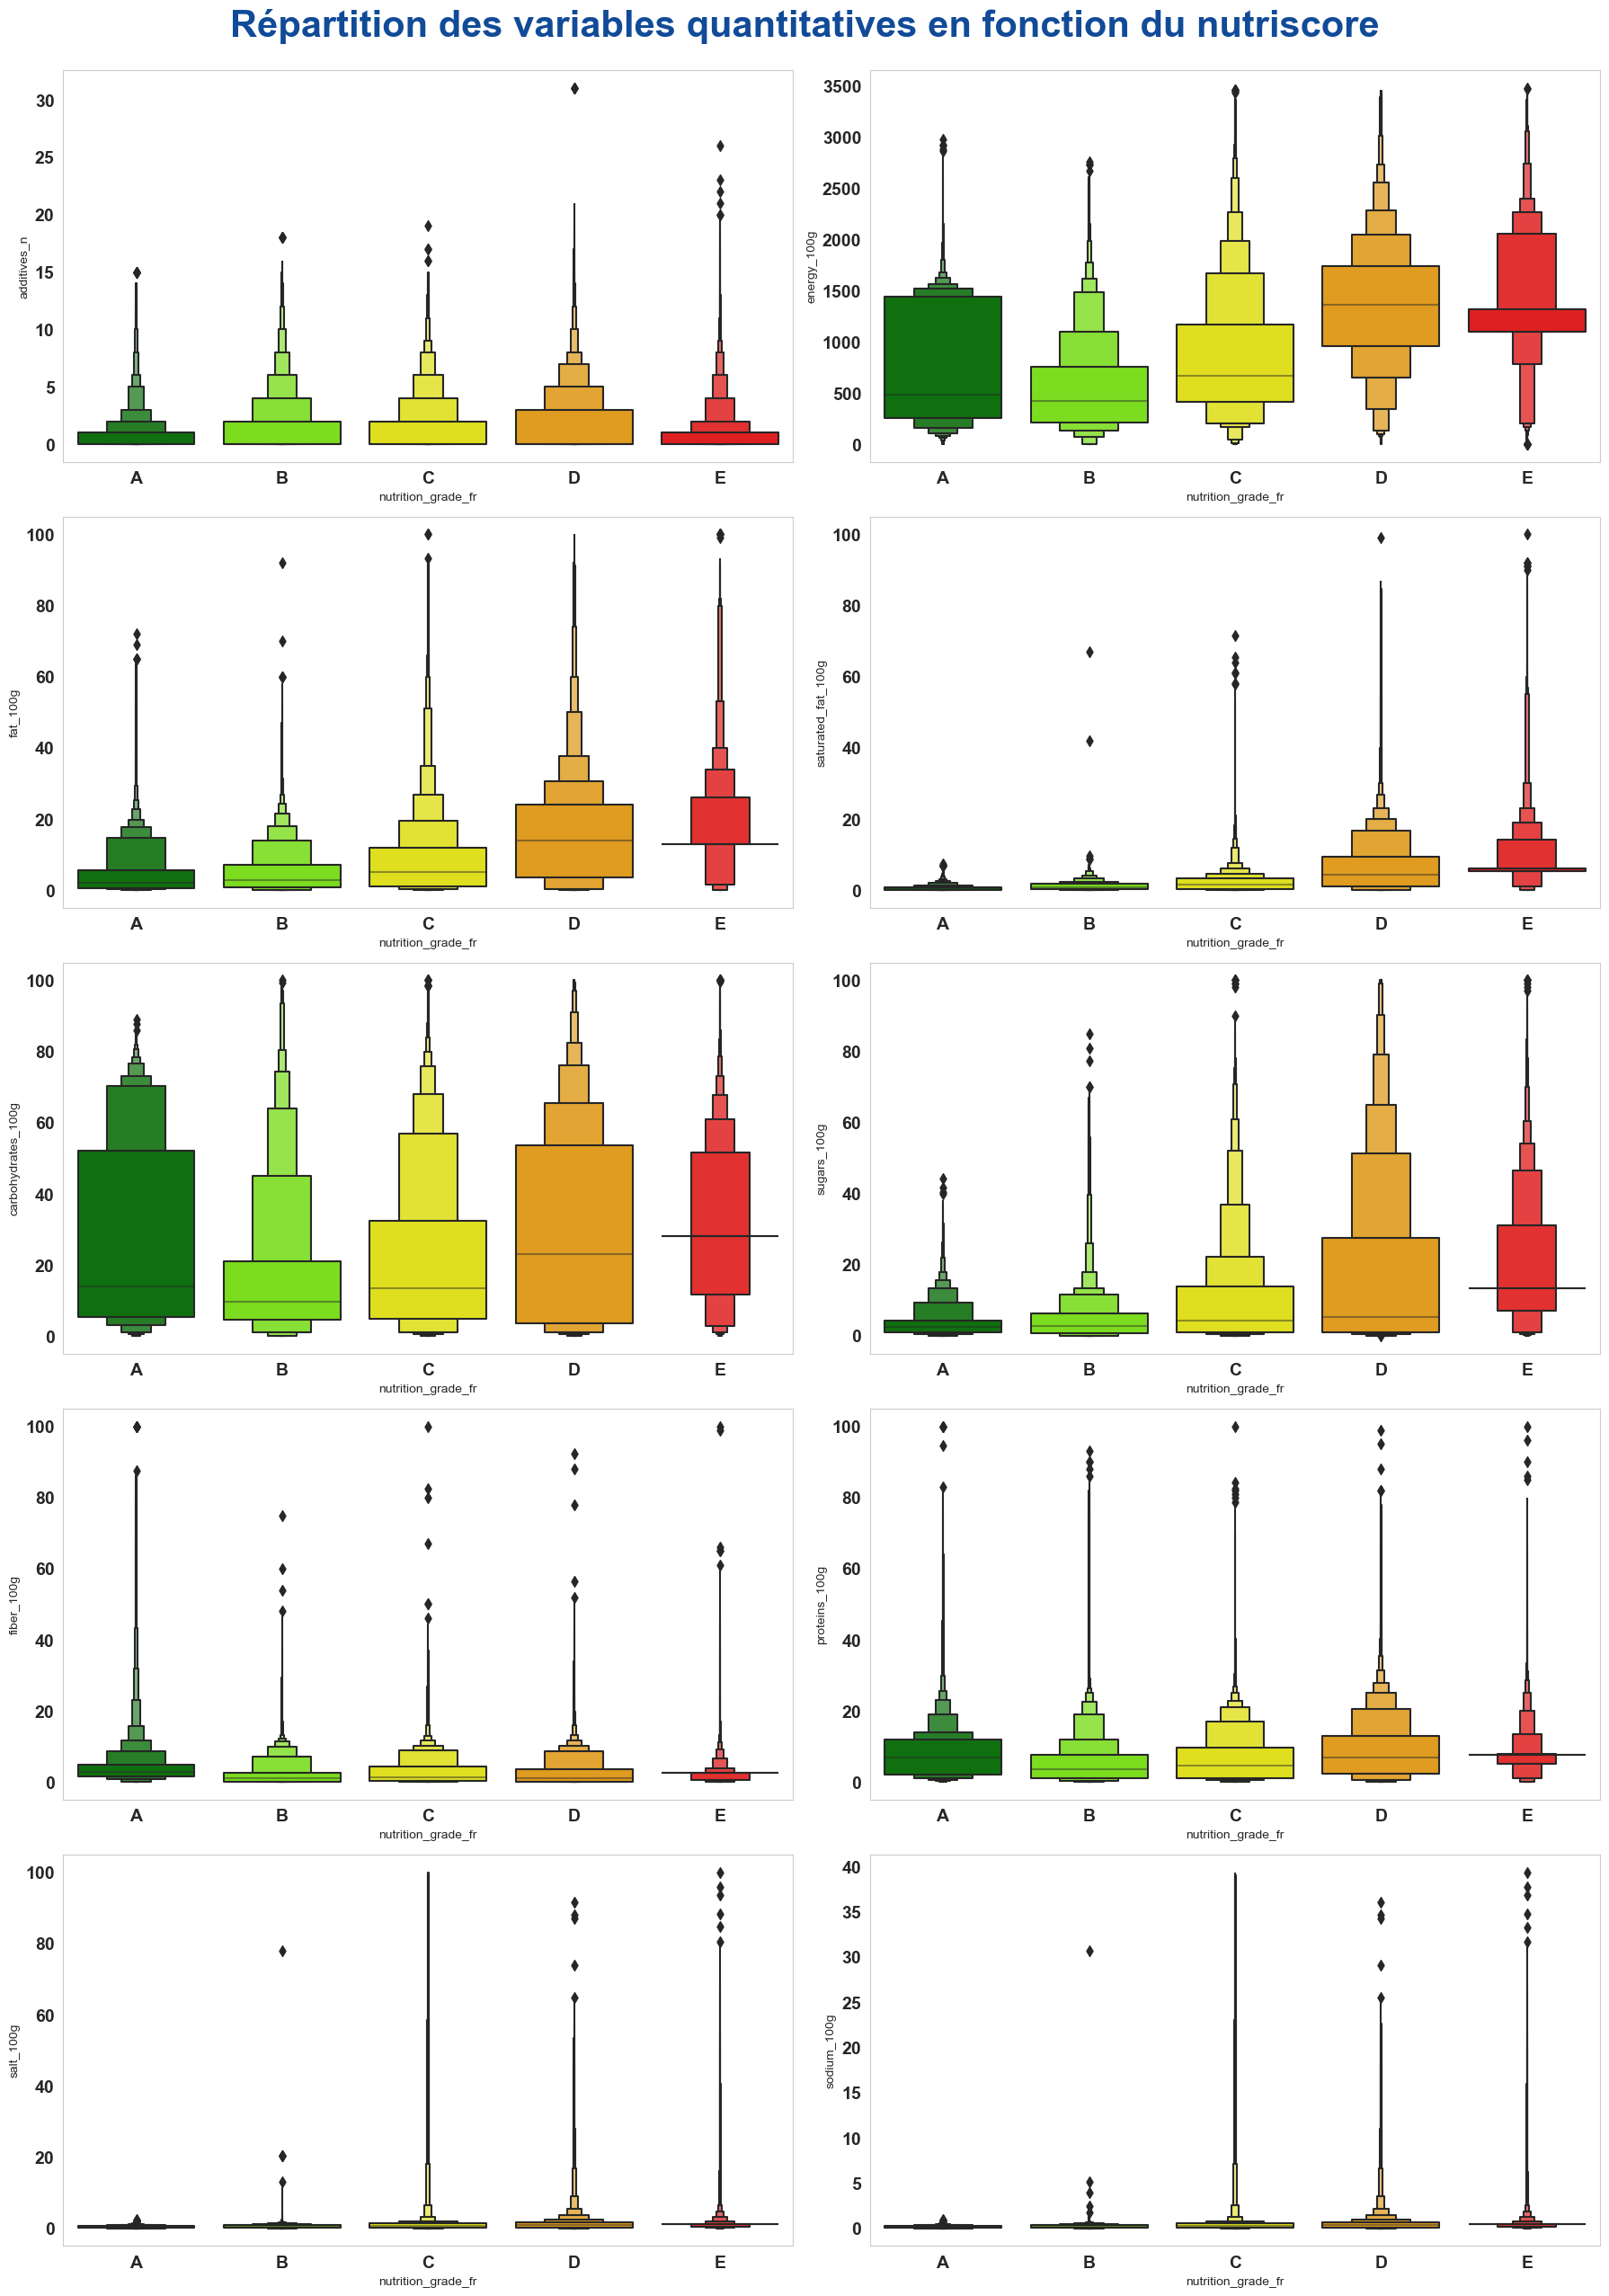

In [52]:
fig = plt.figure(figsize=(18, 30))
fig.suptitle("Répartition des variables quantitatives en fonction du nutriscore", y=1, fontsize=30, color = '#114b98', fontweight='bold')
for i, c in enumerate(var_num, 1):
    ax = fig.add_subplot(6, 2, i)
    sns.boxenplot(data=leucinose, x="nutrition_grade_fr", y=c, order=list("ABCDE"), ax=ax, palette=colors_nutri)
    plt.grid(axis="y")
    plt.xticks(fontsize=14, fontweight="bold")
    plt.yticks(fontsize=14, fontweight="bold")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()

**_Les additifs_** : le nombre d'additifs présent dans un produit semble influencer faiblement la note nutritionnelle. En, effet, même si plus un produit contient des additifs plus il est mal noté, on remarque aussi que certains produits avec jusqu'à additifs sont notés "A" ou "B". Une analyse de la variance permettra de vérifier cette observation ;<br>
<br>
**_Les Lipides_** : plus un produit contient des lipides (ou des acides gras saturés), plus il est mal noté ;<br>
<br>
**_Glucides/Sucres_** : plus un produit contient du sucre, plus il a une note nutri-score élevé synonyme de mauvaise note. Certains produits contenant plus de 60g de glucide sont notés A, il s'agit à fortiori des glucides complexes, qui sont les glucides conseillés dans une alimentation saine (telle que définie dans le PNNS).<br>
<br>
**_Fibres :_** La teneur en fibres semblent ne pas avoir d'impact sur le nutrigrade : la variable relative aux fibres semble peu corrélée au nutrigrade, ce qui ne serait pas conforme à la définition du nutriscore. <br>
<br>
**_Protéines :_** de l'observation de la boîte à moustache des protéines, il ressort la même analyse qu'avec les additifs. Une analyse de la variance permettrait de vérifier la corrélation entre les prtéines et le nutrigrade.<br>
<br>
**_Sel :_** plus le produit contient du sel, plus il est mal noté. <br>
<br>
**_Energie :_** plus un produit est riche en calorie, plus il est mal noté.

#### 3.1.1. Cas particulier des protéines
**_Hypothèse à vérifier : plus un produit est riche en protéines, meilleur est son score nutritionnel (les moyennes sont différentes)._**<br>
Pour vérifier cette hypothèse, on va procéder à l'analyse des variances. <br>
Bien que la distribution de la variable "proteins_100g" ne suit pas une loi normale (d'après le test de Jarque Bera réalisé précédemment), vérifions l'homogénéité des variances de la variable "nutrition_grade_fr".

In [53]:
# Test d'homogénéité de Bartlett : 

# prépartion des échantillons :

sample = leucinose.groupby('nutrition_grade_fr')['proteins_100g']
nutrigrade = pd.DataFrame([sample.get_group(n).values for n in list('ABCDE')],
                          index=list('ABCDE')).T

nutrigrade_A = nutrigrade['A']
nutrigrade_B = nutrigrade['B']
nutrigrade_C = nutrigrade['C']
nutrigrade_D = nutrigrade['D']
nutrigrade_E = nutrigrade['E']

# Hypothèse et condition de validitée :

# H0 : les groupes sont homoscédastiques : les variances sont identiques
# H1 : les groupes sont hétéroscédastiques : les variances sont différentes
# p_value>0.05 rejet de H1 en faveur de H0
# p_value<=0.05 H0 rejetée en faveur de H1

# Réalisation du test :

F_val, p_value = stats.bartlett(nutrigrade_A, nutrigrade_B, nutrigrade_C, nutrigrade_D, nutrigrade_E)

print("Test Bartlett - resultats: F = ", F_val)
print("P_value =", p_value)
print("Groupes probablement homoscédastiques") if p_value > 0.05 else print(
    "Groupes probablement hétéroscédastiques")

Test Bartlett - resultats: F =  16015.840143605586
P_value = 0.0
Groupes probablement hétéroscédastiques


Les distributions ne suivant pas une loi normale et les variables étant hétéroscédastiques, on utilisera un test non paramétrique pour vérifier notre hypothèse.<br>

Néanmoins, nous pouvons réaliser le test ANOVA à titre éducatif.

In [54]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

anova_category = smf.ols('proteins_100g~nutrition_grade_fr', data=leucinose).fit()
print(anova_category.summary())

                            OLS Regression Results                            
Dep. Variable:          proteins_100g   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     430.4
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:33:28   Log-Likelihood:            -3.0004e+05
No. Observations:               90970   AIC:                         6.001e+05
Df Residuals:                   90965   BIC:                         6.001e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [55]:
# H0 : les moyennes sont identiques : la teneur en protéines n'influence pas le nutriscore
# H1: les moyennes sont différentes : la teneur en protéines influence le nutriscore
# Seuil de test : 5%

#Tableau d'analyse de variance
sm.stats.anova_lm(anova_category, typ=2)

sum_sq       df           F  PR(>F)
nutrition_grade_fr  7.383034e+04      4.0  430.383829     0.0
Residual            3.901156e+06  90965.0         NaN     NaN

Les résultats du test de Fisher nous indiquent ici une p-value de 0 pour l'ensemble des catégories, donc inferieur au niveau de test de 5%. Nous rejettons donc l'hypothèse H0 selon laquelle les ditributions sont identiques.<br>
La teneur en protéines à donc une influence sur le Nutriscore.

Vérifions cette hypothèse avec un test non paramétrique : test de Kruskal Wallis

In [56]:
from pingouin import kruskal

In [57]:
# test de Kruskal Wallis au seuil de 0,05
kruskal(data=leucinose, dv='proteins_100g', between='nutrition_grade_fr')

Source  ddof1            H  p-unc
Kruskal  nutrition_grade_fr      4  4023.125879    0.0

La valeur P est égal à 0 : la teneur en protéines à donc une influence sur le nutriscore. <br>

<br> Le résultat obtenu avec le test non paramétrique est le même qu'avec l'ANOVA. On peut dire que l'ANOVA reste robuste (du moins dans ce cas) malgré le non respect des conditions requises.

**_vérification de l'ampleur de la corrélation entre les protéines et le nutrigrade à l'aide l'eta carré_**

In [58]:
X = 'nutrition_grade_fr'  # qualitative
Y = 'proteins_100g'  # quantitative


def eta_squared(x, y):
    moyenne_y = y.mean()
    nutris = []
    for nutri in x.unique():
        yi_nutri = y[x == nutri]
        nutris.append({'ni': len(yi_nutri),
                       'moyenne_nutri': yi_nutri.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_nutri']-moyenne_y)**2 for c in nutris])
    return SCE/SCT
eta_squared(leucinose[X], leucinose[Y])

0.018573736856862415

**_conclusion : _** il existe une corrélation entre les protéines et le nutriscore. Mais cette corrélation est très faible. C'est pour cette raison que certains produits riches en protéines sont noté "A" et d'autres "E".<br> Cette faible corrélation peut s'expliquer par le fait que le nutriscore est aussi corrélé aux autres nutriments qui, d'une certaine manière, influencent la note globale du nutriscore.

#### 3.1.2. Cas particulier des additifs
Est-ce que la présence d'additifs influe sur le grade nutritionnel ?
On va procéder par l'analyse de la variance pour répondre à cette question (comme pour le cas des protéines).

In [59]:
#H0 : la présence d'additifs n'influe pas sur le nutrigrade
# H1 : la présence d'additifs influence le nutrigrade

kruskal(data=leucinose, dv='additives_n', between='nutrition_grade_fr')

Source  ddof1            H  p-unc
Kruskal  nutrition_grade_fr      4  3227.674925    0.0

P est < 0,05. Le nutrigrade est donc corrélé aux additifs.

**_Vérification de l'ampleur de la corrélation entre les additifs et le nutrigrade à l'aide l'eta carré_**

In [60]:
X = 'additives_n'  # qualitative
Y = 'proteins_100g'  # quantitative


def eta_squared(x, y):
    moyenne_y = y.mean()
    nutris = []
    for nutri in x.unique():
        yi_nutri = y[x == nutri]
        nutris.append({'ni': len(yi_nutri),
                       'moyenne_nutri': yi_nutri.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_nutri']-moyenne_y)**2 for c in nutris])
    return SCE/SCT
eta_squared(leucinose[X], leucinose[Y])

0.006140969004091416

Tout comme avec les protéines, l'ampleur de la relation entre les additifs et le grade nutritionnel est très faible.<br> Dans un produit bien noté au nutriscore, on peut retrouver autant d'additifs que dans un produit mal noté. <br> Cette observation n'est pas une surprise car, les additifs ne sont pas pris en compte dans le calcul du nutriscore.

#### 4. Analyse combiné des protéines, nutrigrade et additifs 

Recherchons ici, s'il existe des produits bien noté, mais contenant des additifs interdits pour les personnes atteintes de leucinose.

In [61]:
additifs_interdit = leucinose.dropna()[leucinose.dropna()["additives_fr"].str.contains("E952|E954|E950|E951|E955|E969")]

In [62]:
# Recherche des produits pauvres en protéines (<6g) : conseiller pour l'alimentation des personnes atteintes de leucinose
# Recherche des produits bien noté, nutriscore A ou B
# Recherche des produits contenant des additifs dangereux pour les personnes atteintes de leucinose : E952|E954|E950|E951|E955|E969"
cond1 = leucinose['nutrition_grade_fr'].between('A', 'B')
cond2 = leucinose['proteins_100g'].between(0, 5.9)
cond3 = leucinose["additives_fr"].str.contains("E952|E954|E950|E951|E955|E969")


df_pauvre_prot_score_A_nova12 = leucinose.loc[cond1 & cond2 & cond3,
                                         ['pnns_groups_1', 'pnns_groups_2', 'additives_fr',
                                          'product_name', 'proteins_100g',
                                          'nutrition_grade_fr']] \
    .sort_values(['proteins_100g', 'nutrition_grade_fr'])
df_pauvre_prot_score_A_nova12.style.hide(axis="index")

In [63]:
df_pauvre_prot_score_A_nova12.shape

(377, 6)

Les produits aux nutriscore "A" ou "B", contenant les additifs interdits appartiennent :
- essentiellement aux produits de la catégorie snack sucré et boissons (aromatisées) ;
- On retrouve aussi les produits de la catégorie "lait et produit laitier".

En observant de près, on peut constater que ces produits alimentaires sont des aliments ultra transformés. On peut regretter l'absence du "score NOVA" dans ce jeu de données pour évaluer le dégré de tranformation de ces produits. <br>

Le nutriscore tout seul serait insuffisant pour aider les personnes atteintes de leucinose à avoir une alimentation saine. Notre application tire donc toute son utilité.

In [64]:
# Recherche des produits pauvres en protéines (<6g) : conseiller pour l'alimentation des personnes atteintes de leucinose
# Recherche des produits bien noté, nutriscore A ou B
# Recherche des produits contenant des additifs toxique 
cond1 = leucinose['nutrition_grade_fr'].between('A', 'B')
cond2 = leucinose['proteins_100g'].between(0, 5.9)
cond3 = leucinose["additives_fr"].str.contains("E120|E123|E131|E171|E319|E338|E339|E340|E341|E343|E432|E433|E434|E435|E436|E442|E450|E451|E452|E466|E468|E469|E471|E472b|E472c|E472d|E472e|E472f|E473|E474|E475|E476|E477|E479b|E481|E482|E491|E492|E493|E494|E495|E520|E522|E523|E541|E551|E552|E553b|E554|E555|E620|E621|E622|E623|E624|E625|E950|E951|E952|E954|E955|E962|E1410|E1412|E1413|E1414|E1442|E1452")


df_pauvre_prot_score_A_nova12 = leucinose.loc[cond1 & cond2 & cond3,
                                         ['pnns_groups_1', 'pnns_groups_2', 'additives_fr',
                                          'product_name', 'proteins_100g',
                                          'nutrition_grade_fr']] \
    .sort_values(['proteins_100g', 'nutrition_grade_fr'])
df_pauvre_prot_score_A_nova12.shape

(884, 6)

In [65]:
# Recherche des produits pauvres en protéines (<6g) : conseiller pour l'alimentation des personnes atteintes de leucinose
# Recherche des produits bien noté, nutriscore A ou B
# Recherche des produits contenant des additifs très toxique 
cond1 = leucinose['nutrition_grade_fr'].between('A', 'B')
cond2 = leucinose['proteins_100g'].between(0, 5.9)
cond3 = leucinose["additives_fr"].str.contains("E102|E104|E110|E120|E124|E129|E150c|E150d|E210|E211|E212|E213|E249|E250|E251|E252|E284|E285|E320")


df_pauvre_prot_score_A_nova12 = leucinose.loc[cond1 & cond2 & cond3,
                                         ['pnns_groups_1', 'pnns_groups_2', 'additives_fr',
                                          'product_name', 'proteins_100g',
                                          'nutrition_grade_fr']] \
    .sort_values(['proteins_100g', 'nutrition_grade_fr'])
df_pauvre_prot_score_A_nova12.shape

(339, 6)

In [66]:
# Recherche des produits pauvres en protéines (<6g) : conseiller pour l'alimentation des personnes atteintes de leucinose
# Recherche des produits bien noté, nutriscore A ou B
# Recherche des produits contenant des cancérigènes
cond1 = leucinose['nutrition_grade_fr'].between('A', 'B')
cond2 = leucinose['proteins_100g'].between(0, 5.9)
cond3 = leucinose["additives_fr"].str.contains("E104|E950|E249|E250|E251|E214|E215|E216|E217|E218|E219|E131|E132|E133|E249")


df_pauvre_prot_score_A_nova12 = leucinose.loc[cond1 & cond2 & cond3,
                                         ['pnns_groups_1', 'pnns_groups_2', 'additives_fr',
                                          'product_name', 'proteins_100g',
                                          'nutrition_grade_fr']] \
    .sort_values(['proteins_100g', 'nutrition_grade_fr'])
df_pauvre_prot_score_A_nova12.shape

(439, 6)

### Section 3 : Réduction dimentionnelle
L'objectif dans cette section est de résumer les informations du jeu de données en un certain nombre de variables synthétiques (composantes principales) tout en conservant un maximum d’informations. <br> Pour ce fait, j'utiliserais la méthode de l'Analyse des Composantes principales (ACP) du module decomposition Sklearn sur les variables numériques centrées et réduite. La variable illustrative de cette ACP sera le grade Nutriscore des produits.

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [68]:
# Sélection des variables 
X = leucinose.select_dtypes(include=['float64','int64'])

In [69]:
# Standardisation des données
scaler = StandardScaler()

In [70]:
# Centrage et réduction
X_scaled = scaler.fit_transform(X)

In [71]:
# Calcul des composantes principales
nbr_dim = X_scaled.shape[1]
model = PCA(n_components=nbr_dim)
X_reduit = model.fit_transform(X)

In [72]:
# Exploration des variances préservées par chacune des composantes
model.explained_variance_ratio_

array([9.98144430e-01, 1.16632373e-03, 3.68875850e-04, 1.10337214e-04,
       7.62275133e-05, 5.54633549e-05, 3.50547107e-05, 3.16270938e-05,
       1.16445332e-05, 1.61083342e-08])

In [73]:
# Vérification que la somme cumulée des variances préservées est égal à 1
np.cumsum(model.explained_variance_ratio_)

array([0.99814443, 0.99931075, 0.99967963, 0.99978997, 0.99986619,
       0.99992166, 0.99995671, 0.99998834, 0.99999998, 1.        ])

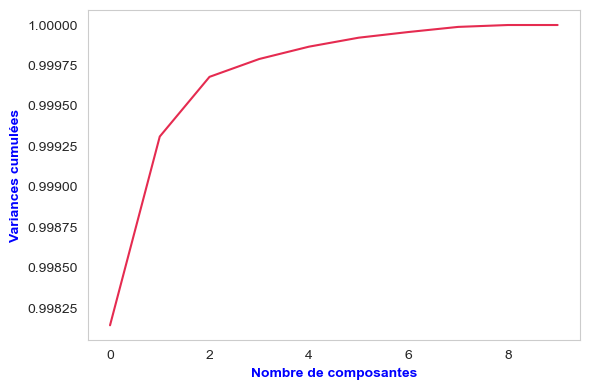

In [74]:
plt.figure(figsize=(6,4))
sns.lineplot(data=np.cumsum(model.explained_variance_ratio_), color="#E52B50")
plt.xlabel("Nombre de composantes", fontsize=10, fontweight="bold", color="blue")
plt.ylabel("Variances cumulées", fontsize=10, fontweight="bold", color="blue")
plt.grid(axis="both")
plt.show()

Avec la première composante (premier coude) on parvient déjà à garder plus de 99% de nos données.

**_Eboulis des valeurs propres_**<br>
Afin d'avoir un aperçu du nombre de composantes nécessaire à l'analyse, nous allons projeter l'éboulis des valeurs propres.

In [75]:
#Instanciation de l'ACP
pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled)

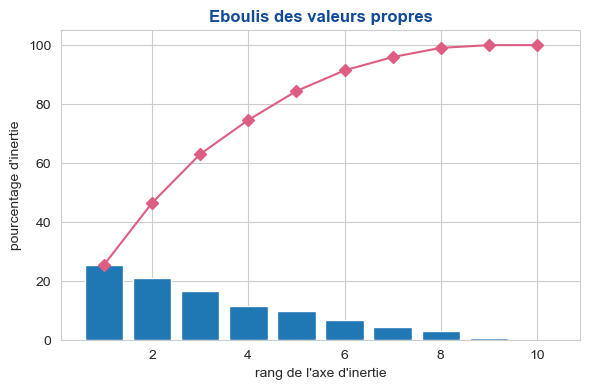

In [76]:
#Variances expliquées
varexpl = pca.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(6,4))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="#DE5D83",marker='D')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres", fontdict=police_titre)
plt.show(block=False)

Aucun coude sur le graphique de l'éboulis des valeurs propres. Mais on peut observer qu'à partir du sixième rang,  le pourcentage d’inertie diminue beaucoup plus lentement lorsque l’on parcourt le diagramme des éboulis de gauche à droite. On peut en déduire que les trois premiers plans factoriels (6 composantes) seront utiles pour l'analyse.

In [77]:
somme = varexpl[0:2].sum() + varexpl[2:4].sum() + varexpl[4:6].sum()
print("Les 3 premiers plans factoriels de l'ACP expliquent", somme, "de la variance.")

Les 3 premiers plans factoriels de l'ACP expliquent 91.433618784821 de la variance.


Une analyse sur F1, F2 et F3 semble donc cohérente.<br>Projetons à présent le cercle des corrélations :

In [78]:
#Espace des composantes principales
pcs = pca.components_

#Matrice des corrélations variables x facteurs
p = X.shape[1]
sqrt_valprop = np.sqrt(pca.explained_variance_)
corvar = np.zeros((p, p))
for dim in range(p):
    corvar[:,dim] = pcs[dim,:] * sqrt_valprop[dim]

#on affiche pour les deux premiers plans factoriels 
corr_matrix = pd.DataFrame({'Variables':X.columns,'CORR_F1':corvar[:,0],'CORR_F2':corvar[:,1], 
              'CORR_F3':corvar[:,2], 'CORR_F4':corvar[:,3], 'CORR_F5':corvar[:,4], 'CORR_F6':corvar[:,5]}).set_index('Variables')
corr_matrix

CORR_F1   CORR_F2   CORR_F3   CORR_F4   CORR_F5   CORR_F6
Variables                                                                     
additives_n         0.047073 -0.082571  0.210088  0.035003  0.968800 -0.079430
energy_100g         0.948286  0.011639  0.111555  0.044794 -0.047913 -0.046061
fat_100g            0.790467  0.238468 -0.351658 -0.160616  0.089074  0.161828
saturated_fat_100g  0.740682  0.188090 -0.267288 -0.355098  0.039777  0.149086
carbohydrates_100g  0.462890 -0.332257  0.656183  0.232719 -0.107221 -0.172045
sugars_100g         0.364964 -0.390883  0.656345 -0.139395 -0.131336 -0.068890
fiber_100g          0.185899  0.061122  0.002798  0.848140  0.018480  0.469766
proteins_100g       0.271877  0.369382 -0.407624  0.452469 -0.030384 -0.622695
salt_100g          -0.084363  0.895025  0.433050 -0.049681 -0.014135  0.025067
sodium_100g        -0.083549  0.895185  0.432944 -0.049388 -0.013838  0.024707

In [79]:
#Variable Illustrative
ivNutrigrade = leucinose['nutrition_grade_fr'].values

#Encodage des grades
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ivNutrigrade = encoder.fit_transform(ivNutrigrade)
ivNutrigrade = ivNutrigrade.reshape((ivNutrigrade.shape[0],1))

#Corrélation de la variable illustrative avec les axes factoriels 
corrIv = np.zeros((ivNutrigrade.shape[1],p))
for j in range(p): 
    for k in range(ivNutrigrade.shape[1]): 
        corrIv[k,j] = np.corrcoef(ivNutrigrade[:,k],X_projected[:,j])[0,1]

In [80]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0, 
               illustrative_var_label=None, illustrative_var_corr=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            fig=plt.figure(figsize=(7,7))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                plt.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #variable illustrative
            if illustrative_var_label is not None :
                plt.annotate(illustrative_var_label,
                             (illustrative_var_corr[0,d1],illustrative_var_corr[0,d2]),
                             color='g')
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                                   illustrative_var_corr[0,d1],illustrative_var_corr[0,d2], 
                                   angles='xy', scale_units='xy', scale=1, color="g", alpha=0.5)

            #ajouter les axes 
            plt.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            plt.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            plt.grid(axis="both")

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1), fontdict=police_titre)
            plt.show(block=False)

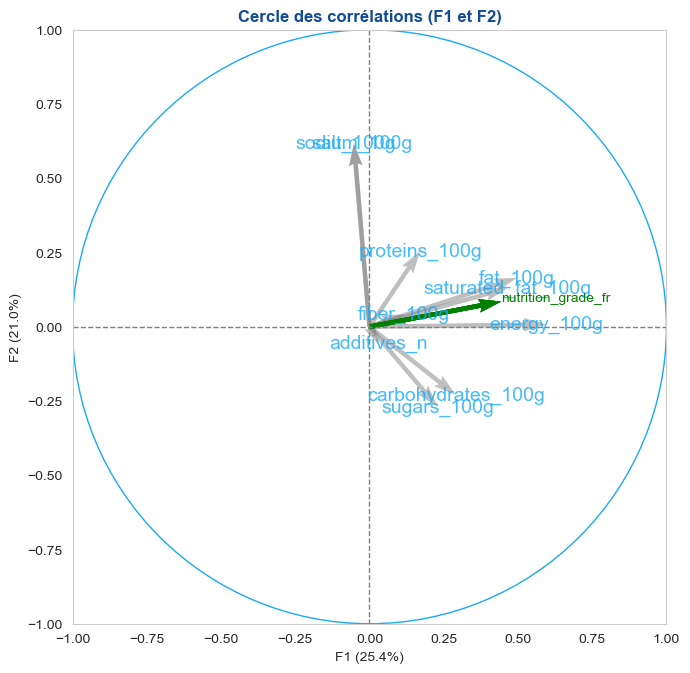

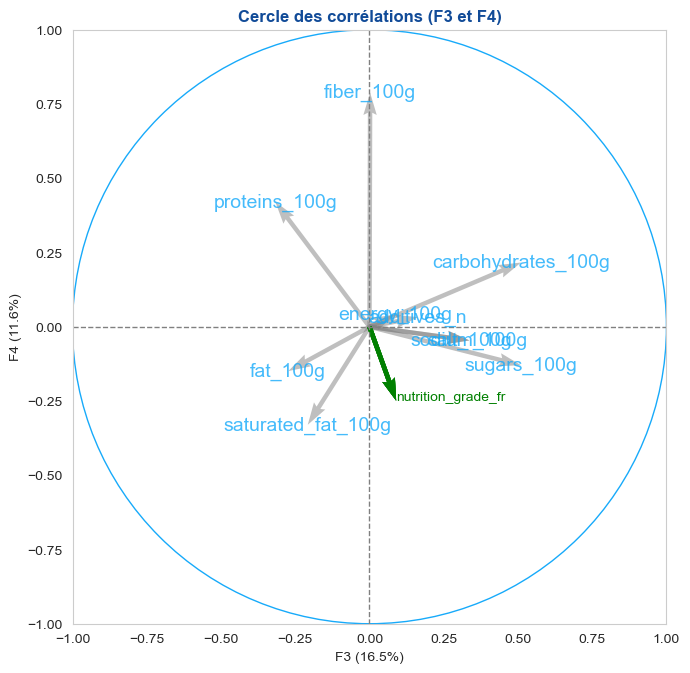

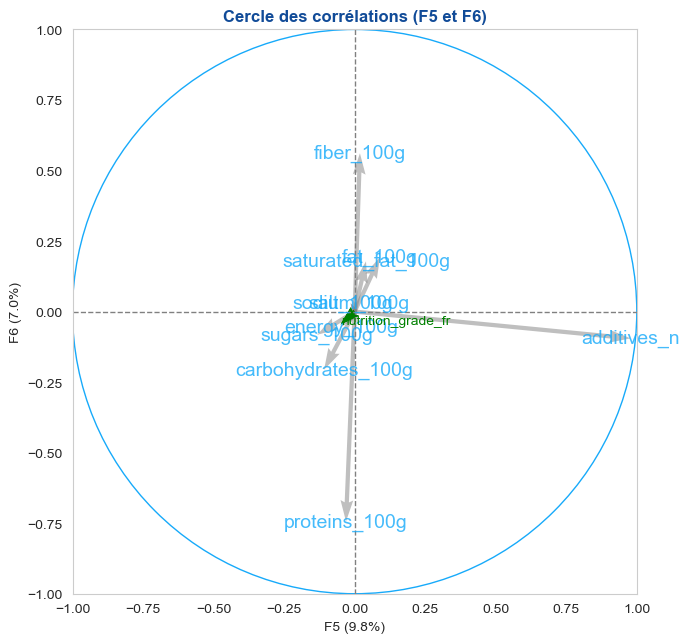

In [81]:
cerle_corr(pcs, 6, pca, [(0,1),(2,3), (4,5)], labels = np.array(X.columns), 
           illustrative_var_label="nutrition_grade_fr", illustrative_var_corr = corrIv)

**_Qualité de représentation de la réduction de dimension_**

Afin d'analyser la performance de notre réduction de dimension via PCA, nous allons regarder la matrice des coefficients des composantes principales.

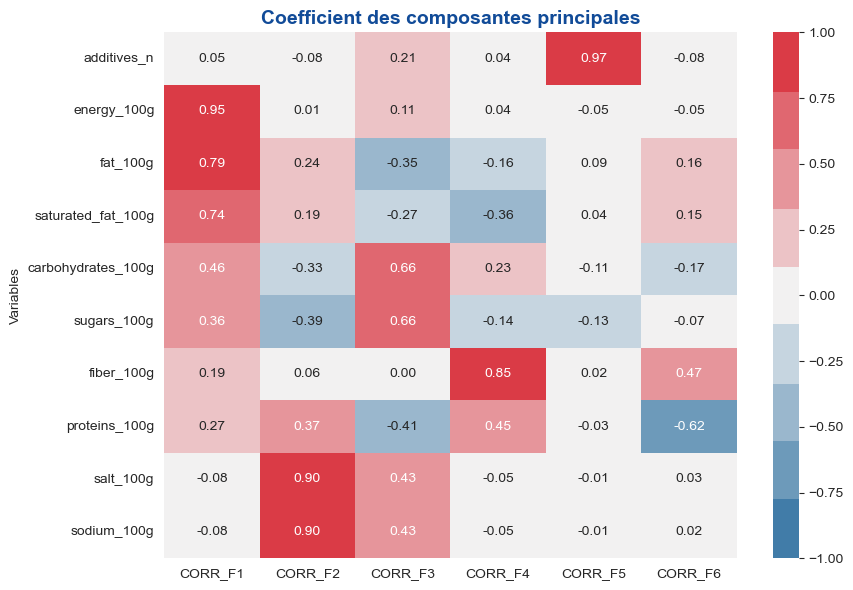

In [82]:
# Matrice des coefficients des composantes principales
fig, ax = plt.subplots(figsize=(9, 6))
palette = sns.diverging_palette(240, 10, n=9)
ax = sns.heatmap(corr_matrix, annot=True, fmt='.2f',
                 cmap=palette, vmin=-1, vmax=1, center=0)
plt.title('Coefficient des composantes principales', fontsize=14, fontdict=police_titre)
plt.show()

##### Bilan
Avec les cercles et la matix des corrélations, on remarque clairement :
- Sur l'axe F1 les corrélations importantes entre l'energie et le caractère "gras" des produits. L'axe F1 va donc parfaitement représenter le facteur "énergétique". On peut noter également la faible relation entre les protéines et les lipides sur cet axe : Les produits riches gras sont pauvres en protéines ; 
- L'axe F2 quant à lui représentera bien les produits "salé" (riche en sodium) ;
- L'axe F3 représentera mieux les produits riches en glucides. Sur cet axe on peut constater que les produits riches en glucides ont une teneur modérée en sel ;
- Sur l'axe F4, on peut noter une corrélation entre les fibres et les protéines ;
- L'axe par contre représentera parfaitement les additifs.

**_Projection des produits sur les plans factoriels_**
On peut à présent visualiser la projection de notre échantillon sur les 3 premiers plans factoriels :

In [83]:
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, )
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} produits sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontdict=police_titre)
            plt.show(block=False)

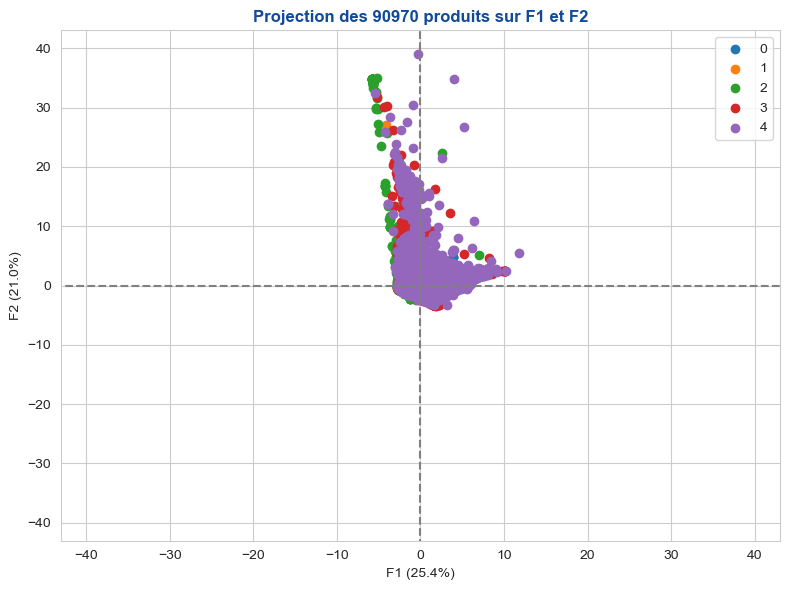

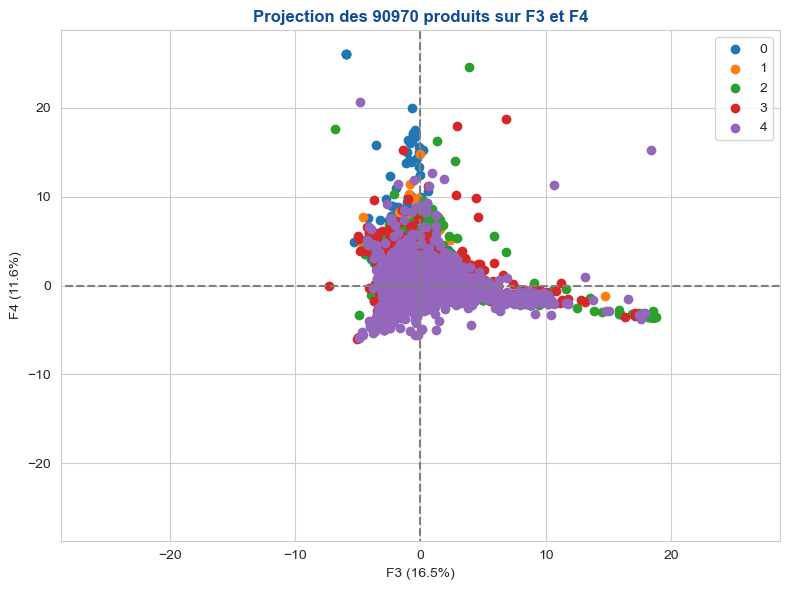

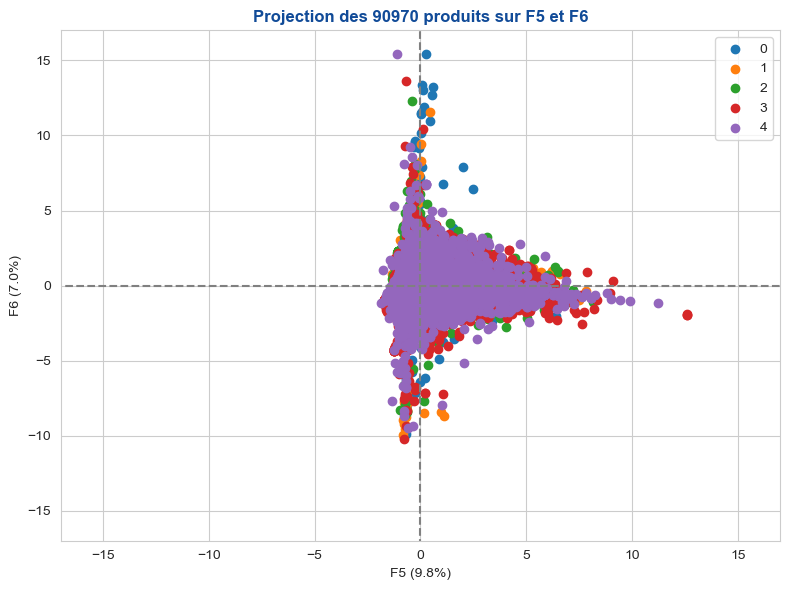

In [84]:
plot_plans_factoriels(X_projected, 6, pca, [(0,1),(2,3), (4,5)], illustrative_var = ivNutrigrade)

### Conclusion

**_Rappel objectif :_**
- Analyser le jeu de données fournit par Open Food Facts afin de vérifier la faisabilité d'une application destinée aux personnes atteintes de leucinose ;
- Les personnes atteintes de leucinose doivent suivre une alimentation pauvre en protéines, saine avec des aliments non ou peu transformés.

**_Conclusion :_**
Le jeu de données contient les informations nutritionnelles utiles à notre idée d'application de moteur de recommandations pour les personnes atteintes de leucinose : les protéines, nutri-score, les nutriments et les additifs. Seuls manquent les informations sur le dégré de transformation des produits (Score NOVA ou SIGA).

En l'absence d'informations sur le dégré de transformation des produits, l'application sera dans un premier temps, un moteur de recommandation : à partir de la recherche ou du scan d'un produit, la liste des produits les plus sains classés par le nombre de g de protéines le plus faible possible sera proposée, après interrogation de la base de données d'Open Food Facts et à nombre de g de protéines équivalent, le produit le plus sain (meilleur note nutriscore) et le moins d'addtifs sera retourné. Les produits contenant les additifs classés dangereux seront proposés, mais une étiquette spéciale.